In [16]:
# Télechargement des bibliothéques
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# Lecture et affectation de la Data
data = pd.read_excel('../data/dataset.xlsx')

In [18]:
# Afficher les premieres 111 lignes de la data
pd.set_option('display.max_row', 111)
# Afficher toutes les colonnes de la data
pd.set_option('display.max_column', 111)

# Analyse de la forme des données

In [19]:
# Création d'une copy de la data pour la manipuler
df = data.copy() 

In [20]:
# Nombres de lignes / colonnes
df.shape

(5644, 111)

In [21]:
# Nombres des types de variables (quantitative, qualitative)
df.dtypes.value_counts()

float64    70
object     37
int64       4
dtype: int64

In [22]:
# Vérification des valeurs Nan
df.isna()

Patient ID  Patient age quantile  SARS-Cov-2 exam result  \
0          False                 False                   False   
1          False                 False                   False   
2          False                 False                   False   
3          False                 False                   False   
4          False                 False                   False   
...          ...                   ...                     ...   
5639       False                 False                   False   
5640       False                 False                   False   
5641       False                 False                   False   
5642       False                 False                   False   
5643       False                 False                   False   

      Patient addmited to regular ward (1=yes, 0=no)  \
0                                              False   
1                                              False   
2                                              False   
3                                              False   
4                                              False   
...                                              ...   
5639                                           False   
5640                                           False   
5641                                           False   
5642                                           False   
5643                                           False   

      Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                 False       
1                                                 False       
2                                                 False       
3                                                 False       
4                                                 False       
...                                                 ...       
5639                                              False       
5640                                              False       
5641                                              False       
5642                                              False       
5643                                              False       

      Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                 False            True   
1                                                 False           False   
2                                                 False            True   
3                                                 False            True   
4                                                 False            True   
...                                                 ...             ...   
5639                                              False            True   
5640                                              False            True   
5641                                              False            True   
5642                                              False            True   
5643                                              False           False   

      Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  \
0           True       True                   True             True   
1          False      False                  False            False   
2           True       True                   True             True   
3           True       True                   True             True   
4           True       True                   True             True   
...          ...        ...                    ...              ...   
5639        True       True                   True             True   
5640        True       True                   True             True   
5641        True       True                   True             True   
5642        True       True                   True             True   
5643       False      False                  False            False   

      Lymphocytes  Mean corpu

<Axes: >

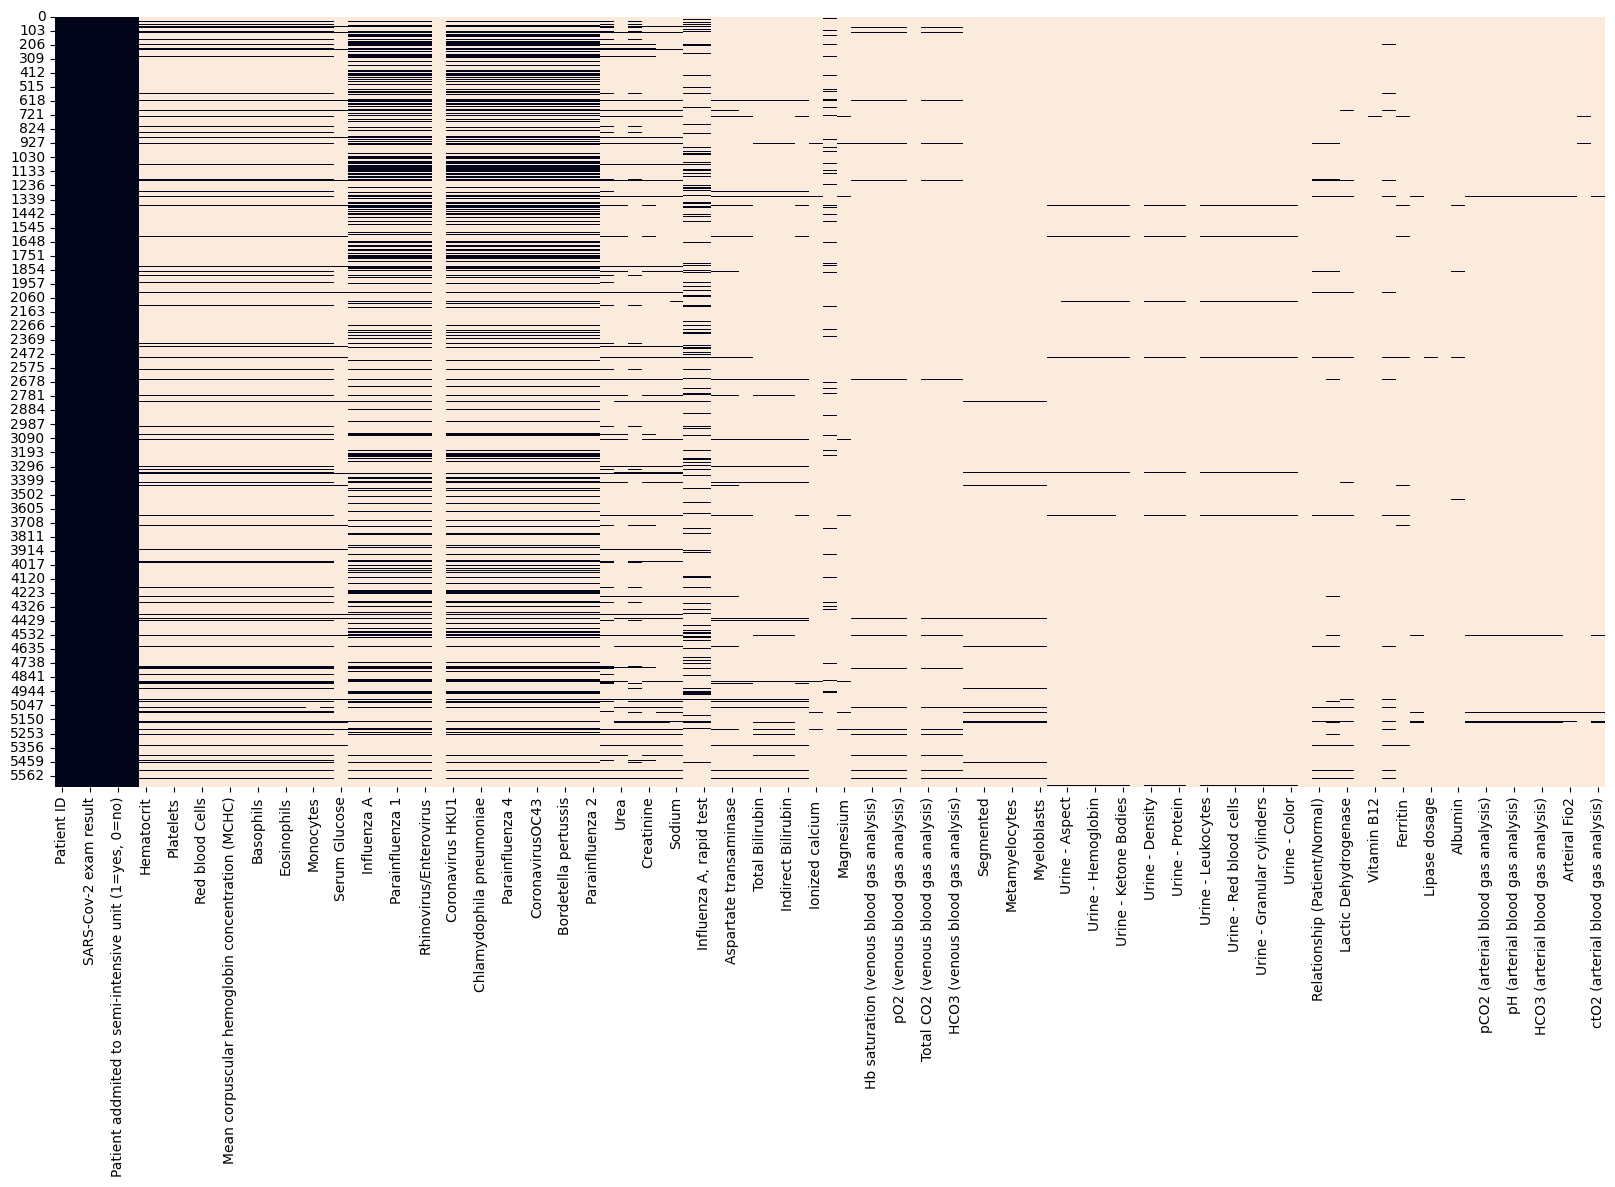

In [59]:
# Affichage du dataset sous la forme d'une image pour une meilleurs lisibilité
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

In [60]:
# Mesurer le pourcentzge des valeurs manquantes
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

Patient ID                                               0.000000
Patient age quantile                                     0.000000
SARS-Cov-2 exam result                                   0.000000
Patient addmited to regular ward (1=yes, 0=no)           0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.000000
Patient addmited to intensive care unit (1=yes, 0=no)    0.000000
Influenza B                                              0.760099
Respiratory Syncytial Virus                              0.760099
Influenza A                                              0.760099
Rhinovirus/Enterovirus                                   0.760454
Inf A H1N1 2009                                          0.760454
CoronavirusOC43                                          0.760454
Coronavirus229E                                          0.760454
Parainfluenza 4                                          0.760454
Adenovirus                                               0.760454
Chlamydoph

Analyse du Fond

In [25]:
# 1. Visualisation initiale 

In [61]:
# Elimination des colonnes ayant plus de 90% de valeurs manquantes (Nan)
df = df[df.columns[df.isna().sum()/df.shape[0] <0.9]]
df.head()

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0  44477f75e8169d2                    13               negative   
1  126e9dd13932f68                    17               negative   
2  a46b4402a0e5696                     8               negative   
3  f7d619a94f97c45                     5               negative   
4  d9e41465789c2b5                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW) Respiratory Syncytial Virus  \
0                                      NaN                         NaN   
1                                -0.625073                not_detected   
2                                      NaN                         NaN   
3                                      NaN                         NaN   
4                                      NaN                not_detected   

    Influenza A   Influenza B Parainfluenza 1 CoronavirusNL63  \
0           NaN           NaN             NaN             NaN   
1  not_detected  not_detected    not_detected    not_detected   
2           NaN           NaN             NaN             NaN   
3           NaN           NaN             NaN             NaN   
4  not_detected  not_detected    not_detected    not_detected   

  Rhinovirus/Enterovirus Coronavirus HKU1 Parainfluenza 3  \
0                    NaN             

In [62]:
# Elimination de la colonne Patient ID car elle ne sert à rien dans notre analyse
df = df.drop('Patient ID', axis=1) 

<Axes: >

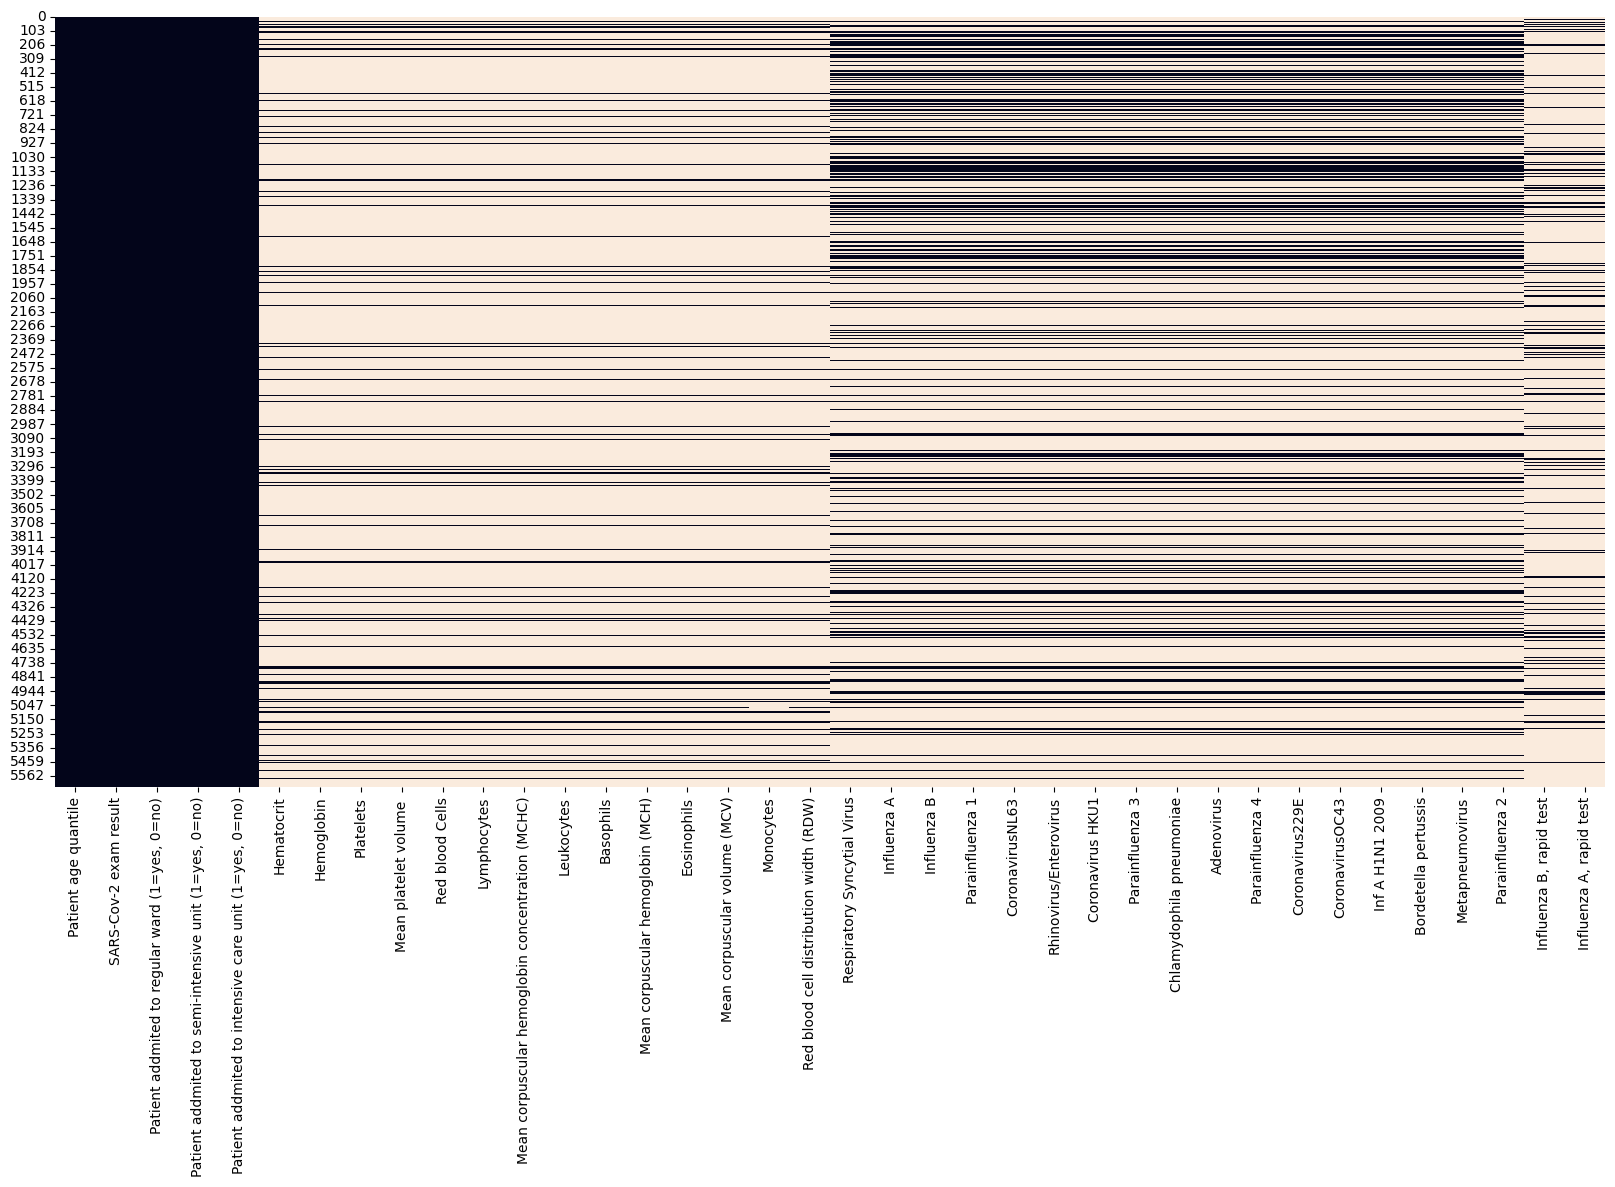

In [63]:
# Reaffichage du dataset sous la forme d'une image 
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

In [29]:
#2. Visualisation de la target

In [64]:
# Comptage des nombres de cas +/- en % 
df['SARS-Cov-2 exam result'].value_counts(normalize=True)

negative    0.901134
positive    0.098866
Name: SARS-Cov-2 exam result, dtype: float64

c:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

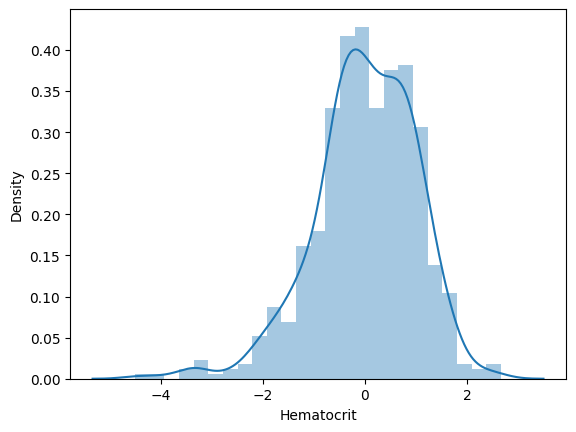

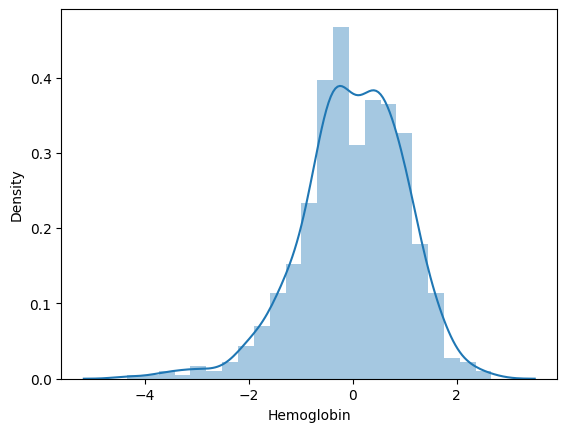

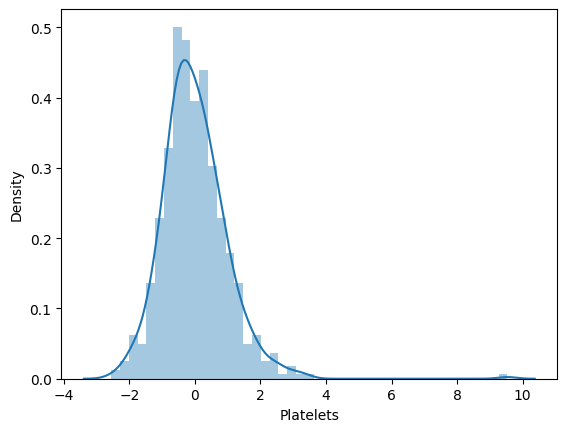

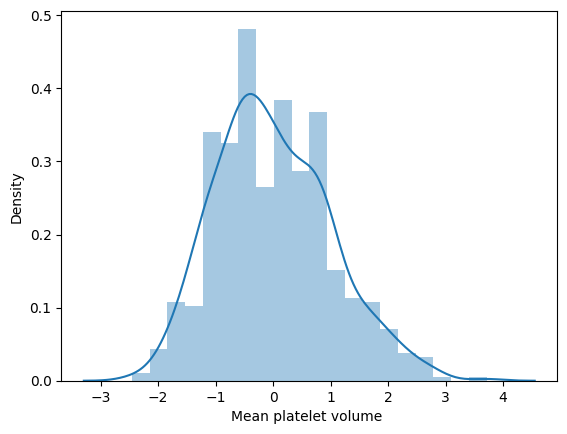

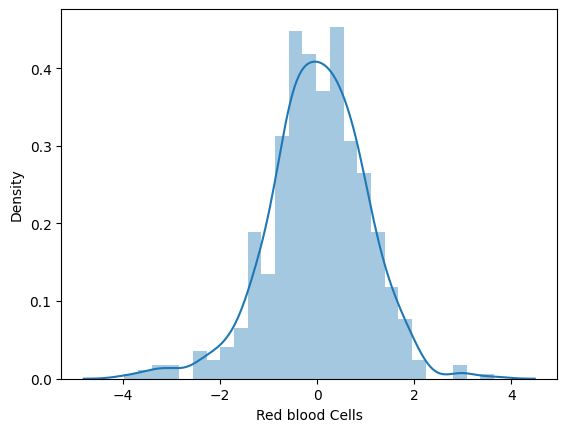

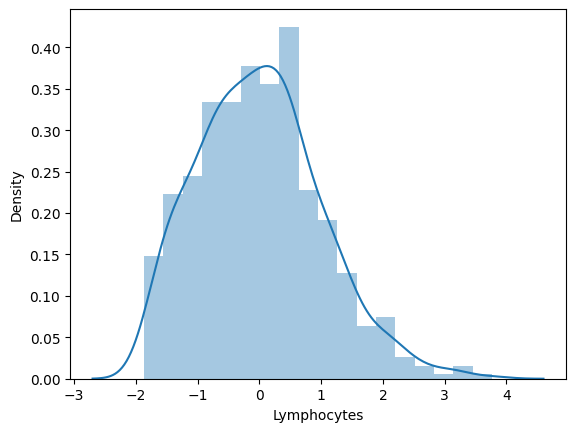

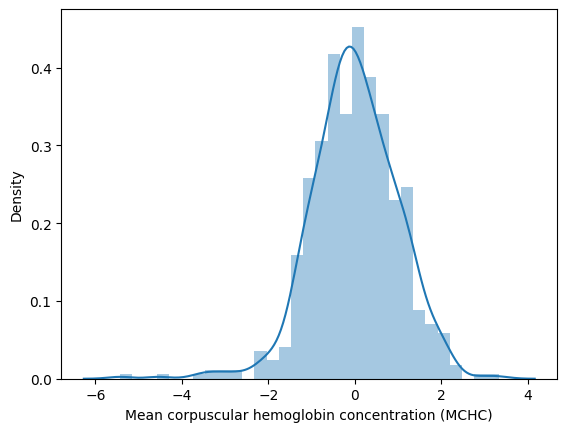

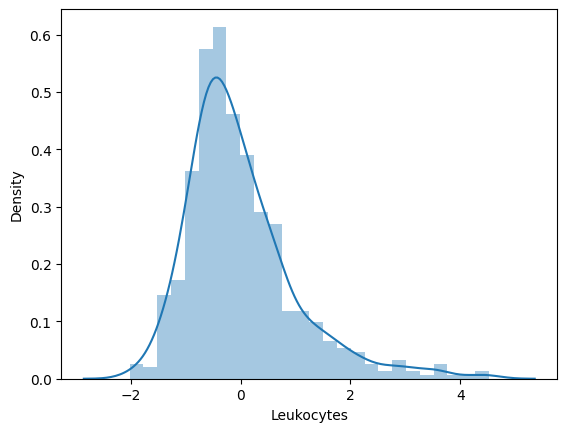

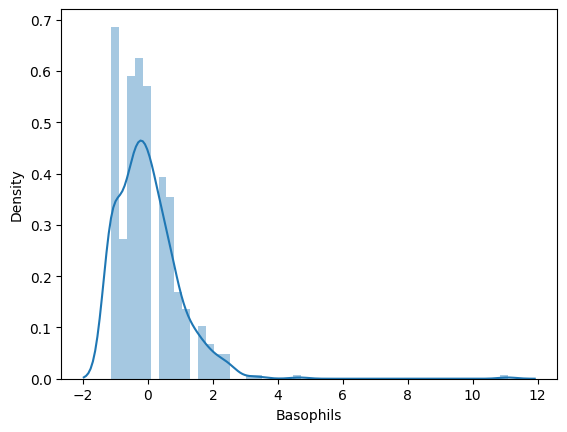

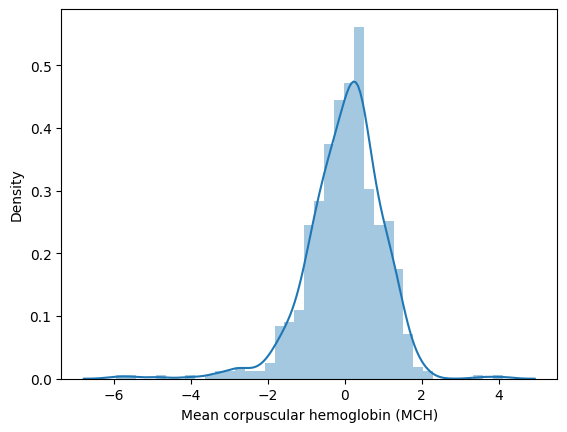

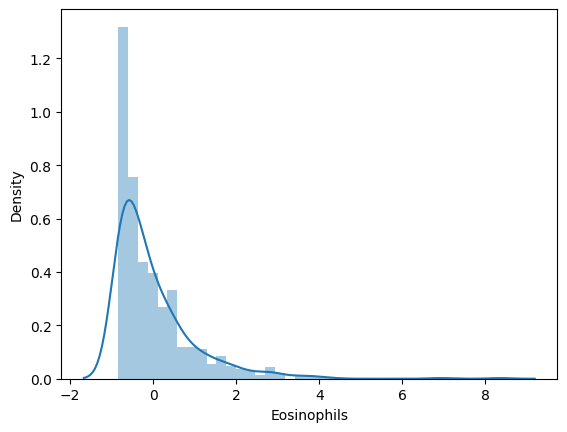

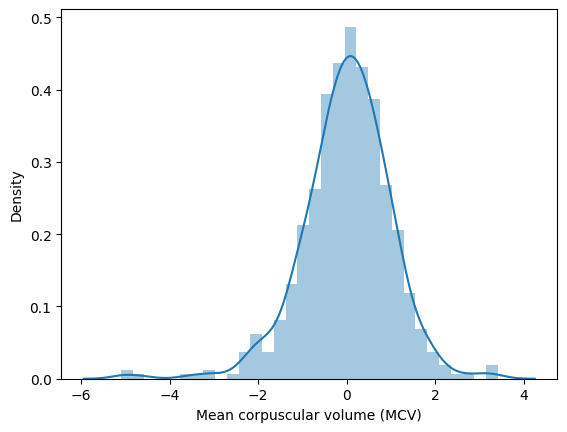

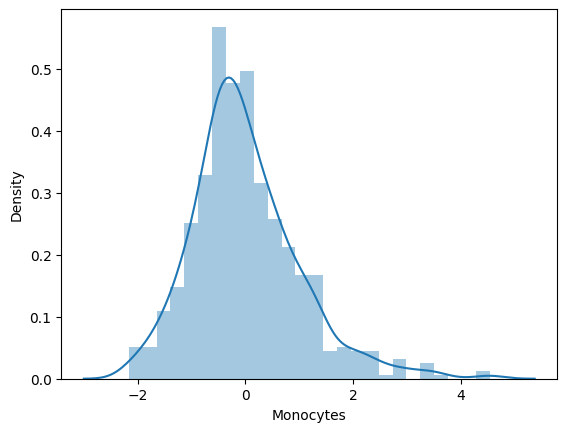

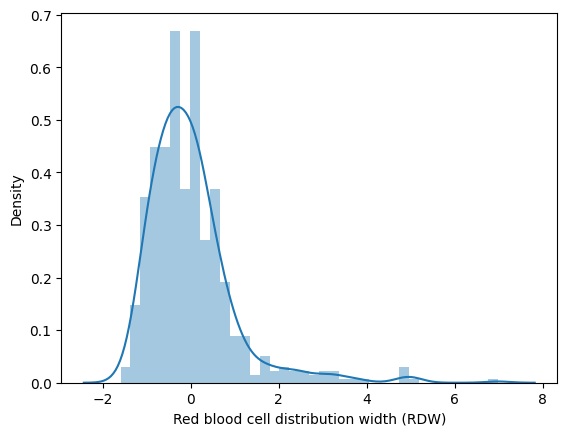

In [65]:
# Histogrammes des variables continues
for col in df.select_dtypes('float'):
    plt.figure()
    sns.distplot(df[col])

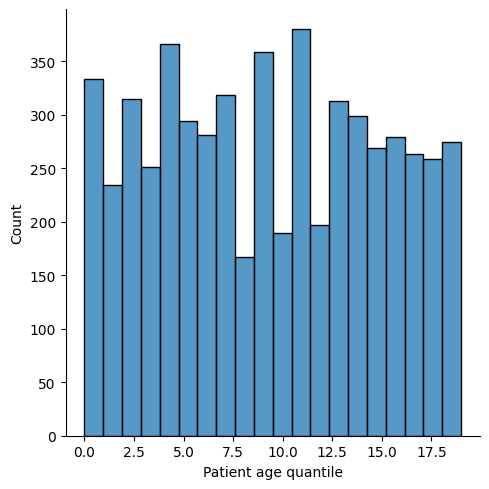

In [66]:
# Histogramme de la colonne Age
sns.displot(df['Patient age quantile'], bins=20)

In [33]:
# Variables Qualitatives

In [67]:
# Affichage des variables qualitatives et leurs catégories
for col in df.select_dtypes('object'):
    print(f'{col :-<50} {df[col].unique()}')

SARS-Cov-2 exam result---------------------------- ['negative' 'positive']
Respiratory Syncytial Virus----------------------- [nan 'not_detected' 'detected']
Influenza A--------------------------------------- [nan 'not_detected' 'detected']
Influenza B--------------------------------------- [nan 'not_detected' 'detected']
Parainfluenza 1----------------------------------- [nan 'not_detected' 'detected']
CoronavirusNL63----------------------------------- [nan 'not_detected' 'detected']
Rhinovirus/Enterovirus---------------------------- [nan 'detected' 'not_detected']
Coronavirus HKU1---------------------------------- [nan 'not_detected' 'detected']
Parainfluenza 3----------------------------------- [nan 'not_detected' 'detected']
Chlamydophila pneumoniae-------------------------- [nan 'not_detected' 'detected']
Adenovirus---------------------------------------- [nan 'not_detected' 'detected']
Parainfluenza 4----------------------------------- [nan 'not_detected' 'detected']
Coronavirus2

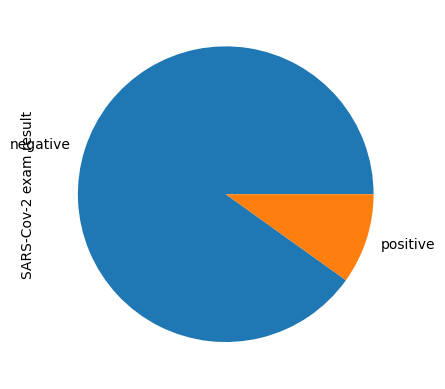

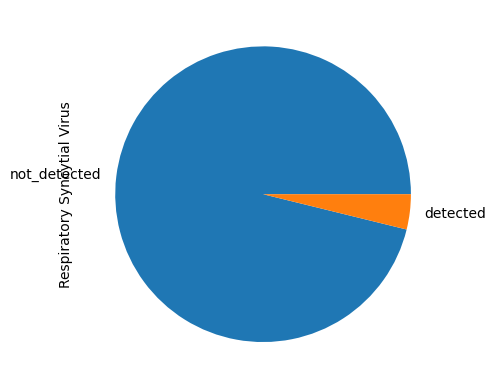

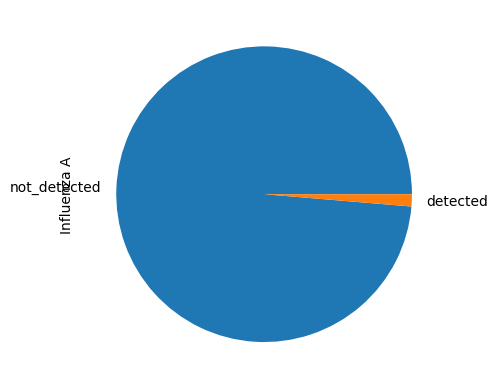

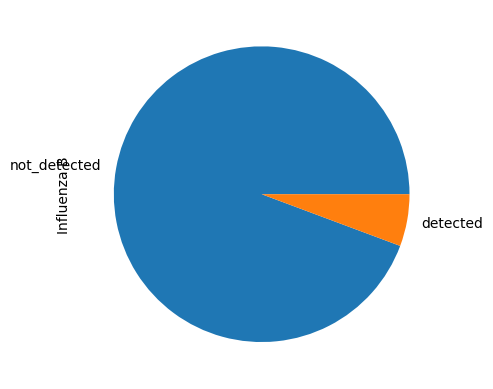

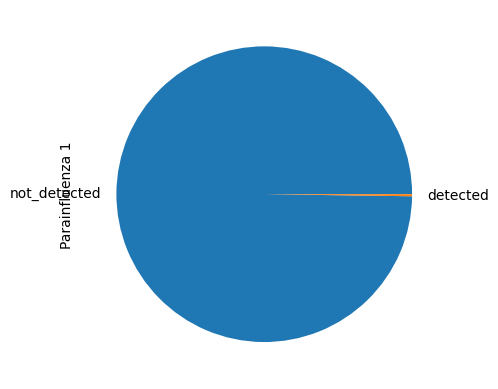

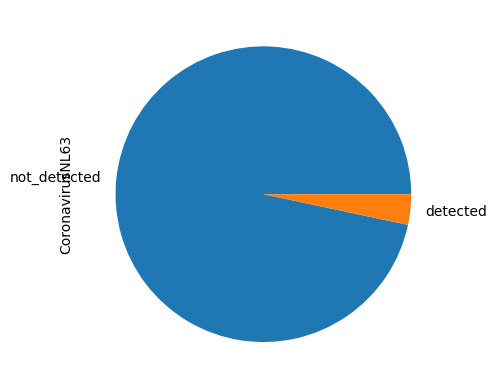

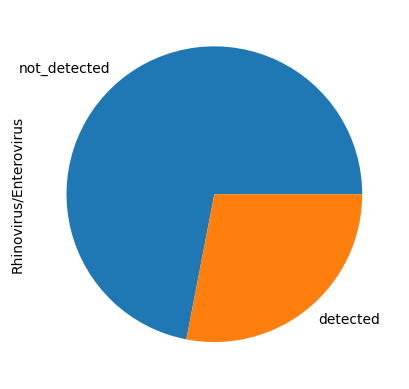

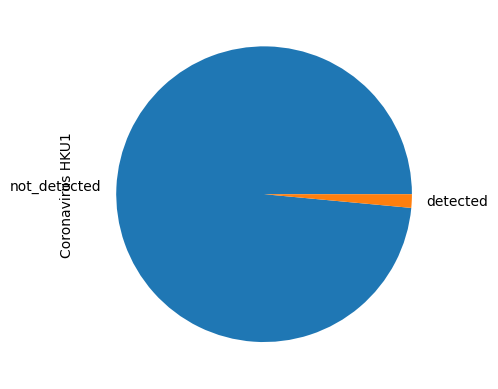

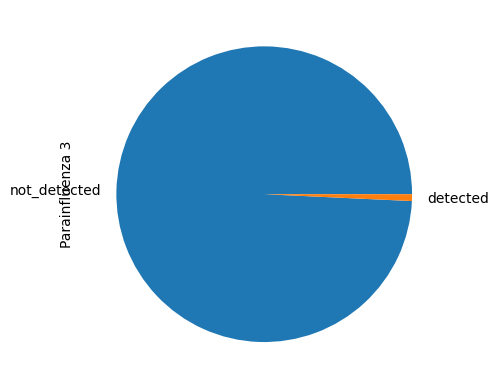

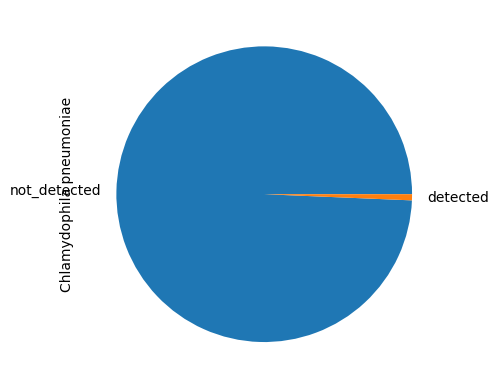

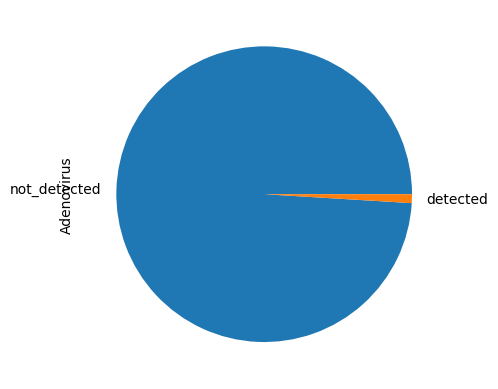

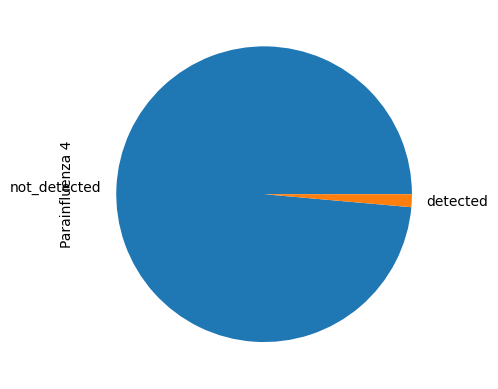

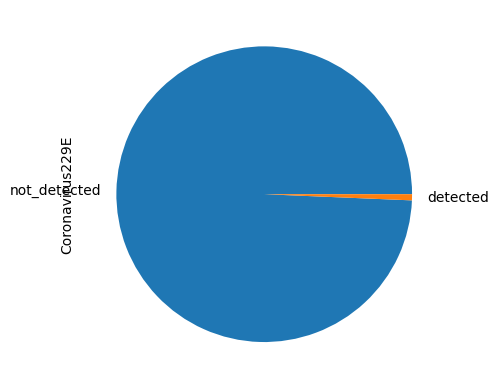

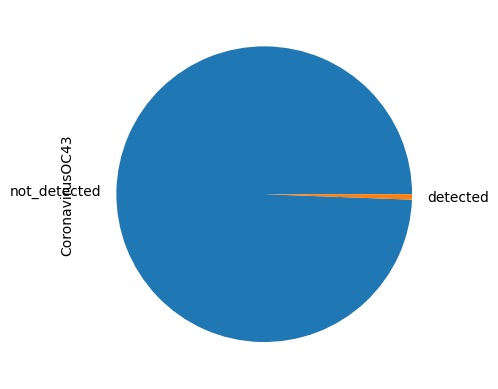

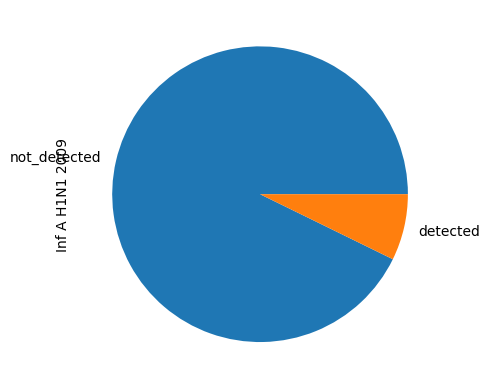

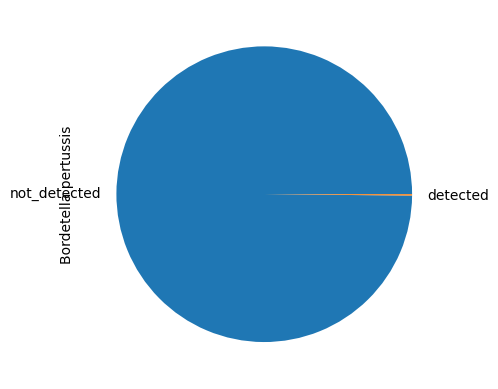

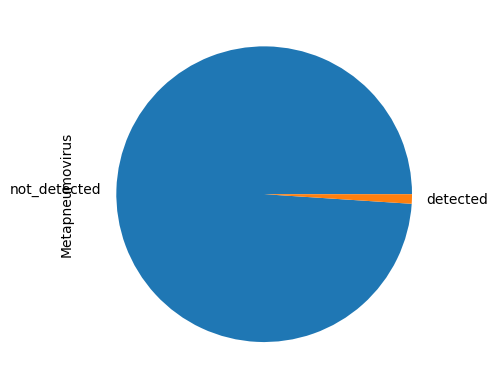

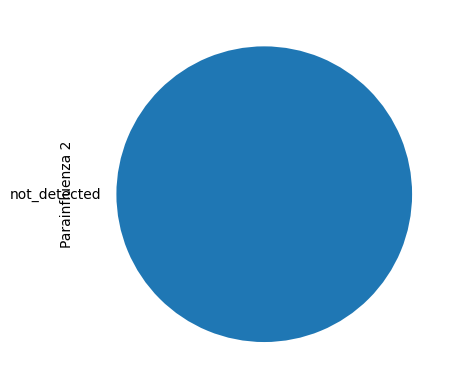

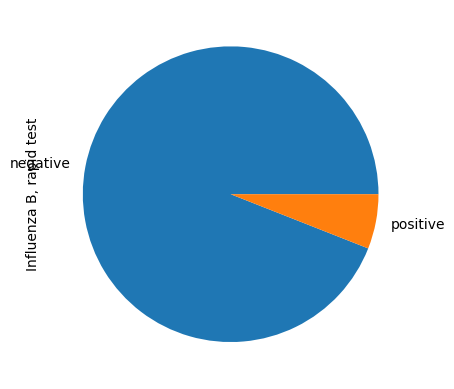

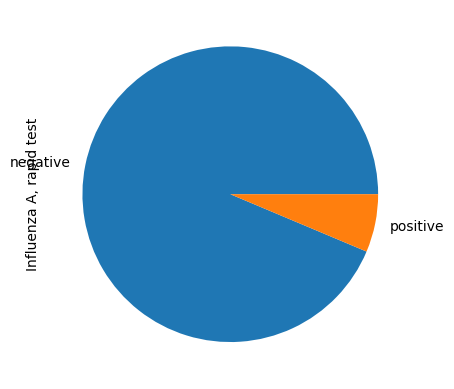

In [68]:
# Visualisation de la distribution des varaibles qualitatives
for col in df.select_dtypes('object'):
    plt.figure()
    df[col].value_counts().plot.pie()

Relation Target / Variables


In [69]:
# Création de sous-ensembles positifs et négatifs pour faciliter l'analyse, car on a 2 groupes
positive_df = df[df['SARS-Cov-2 exam result'] == 'positive']
negative_df = df[df['SARS-Cov-2 exam result'] == 'negative']

In [70]:
# Création des ensembles Blood et viral
missing_rate = df.isna().sum()/df.shape[0]
blood_columns = df.columns[(missing_rate < 0.9) & (missing_rate >0.88)]
viral_columns = df.columns[(missing_rate < 0.88) & (missing_rate > 0.75)]

Target / Blood

c:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

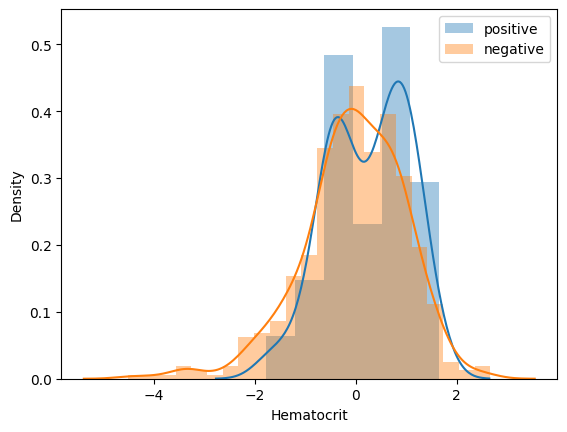

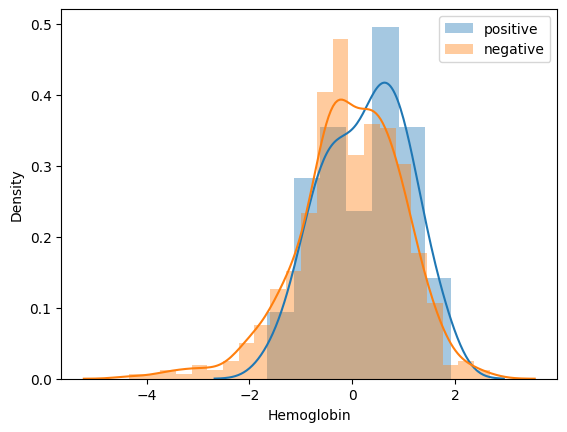

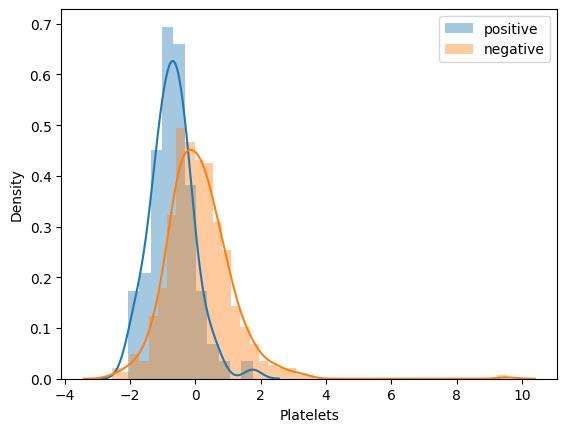

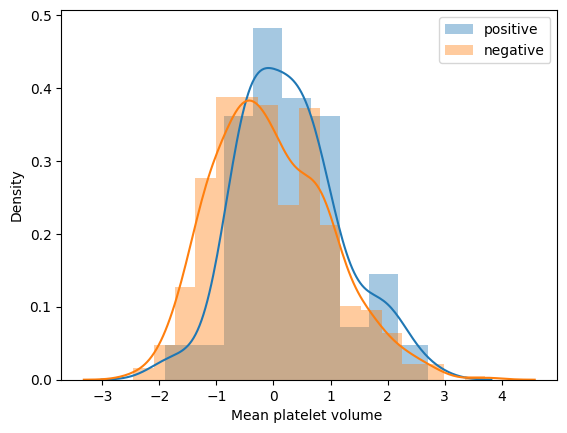

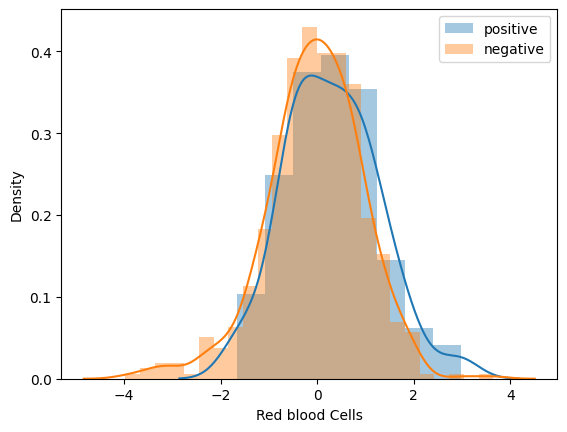

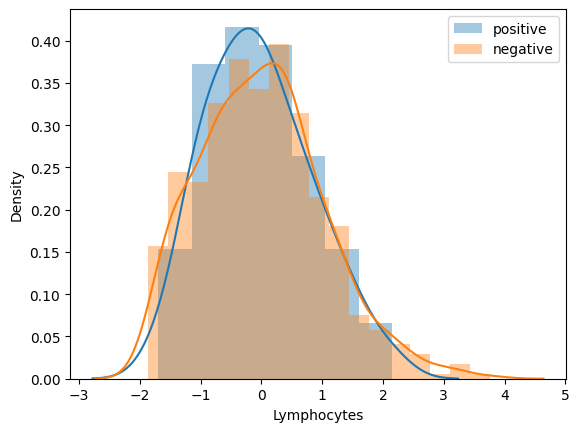

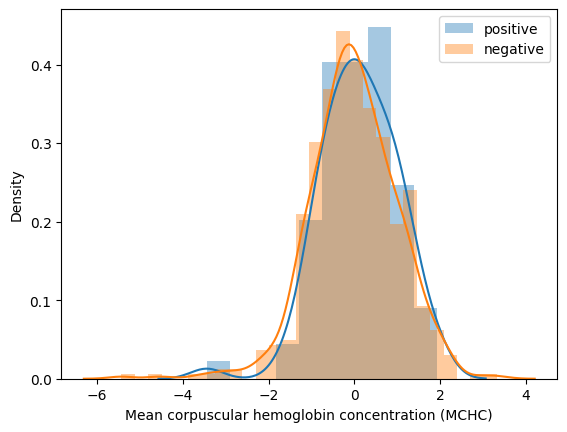

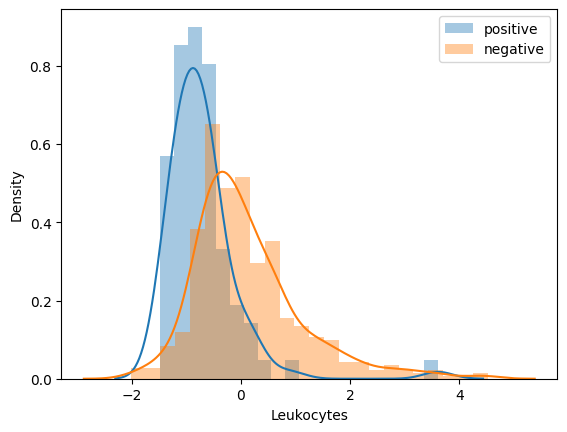

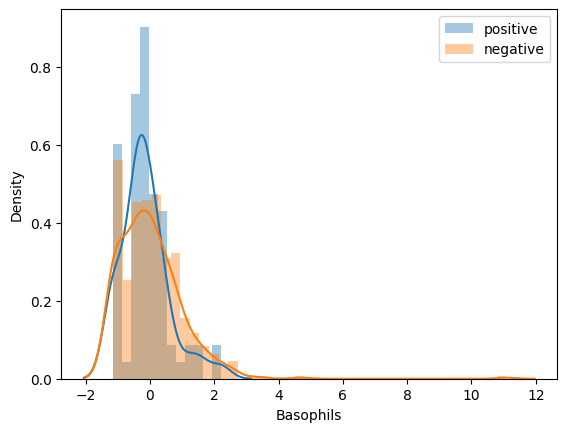

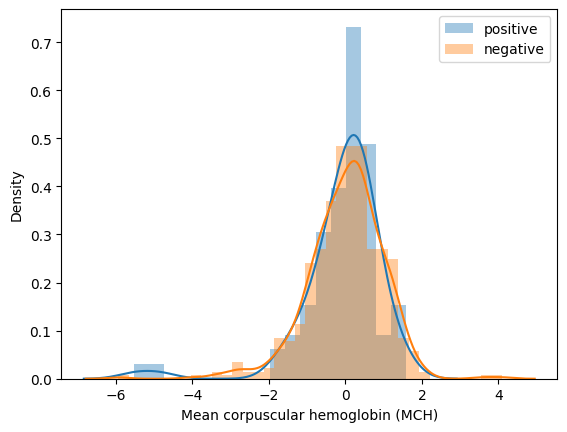

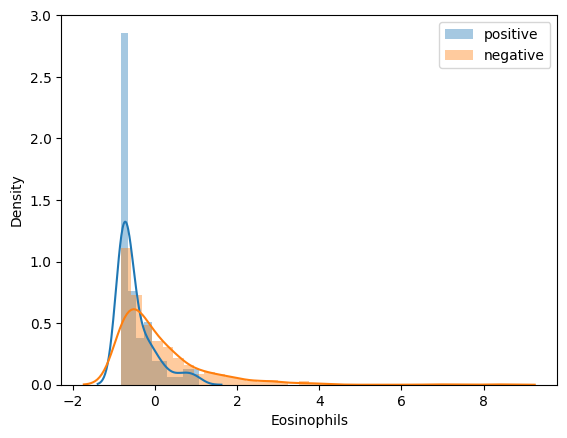

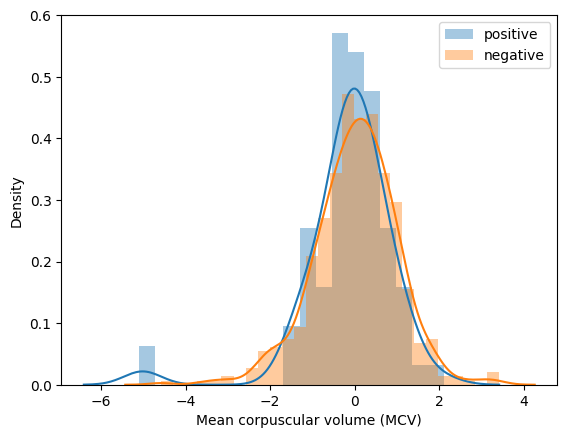

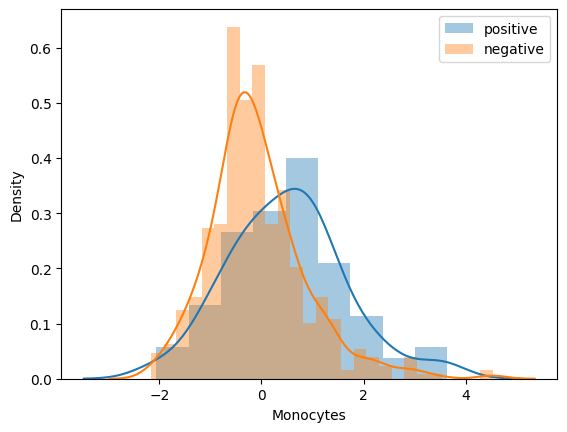

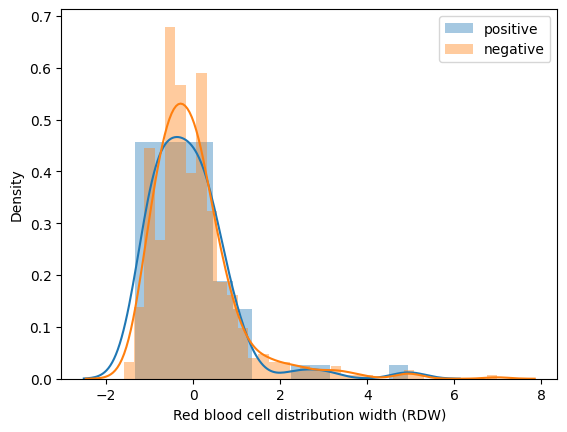

In [71]:
for col in blood_columns:
    plt.figure()
    sns.distplot(positive_df[col], label='positive')
    sns.distplot(negative_df[col], label='negative')
    plt.legend()

Target / Age


<Axes: xlabel='Patient age quantile', ylabel='count'>

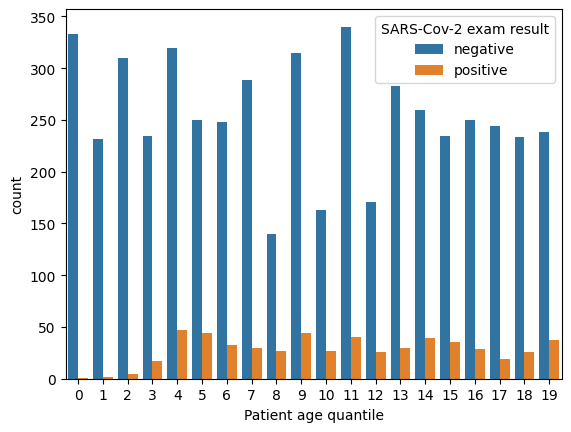

In [72]:
sns.countplot(x='Patient age quantile', hue='SARS-Cov-2 exam result', data=df)

Target / Viral

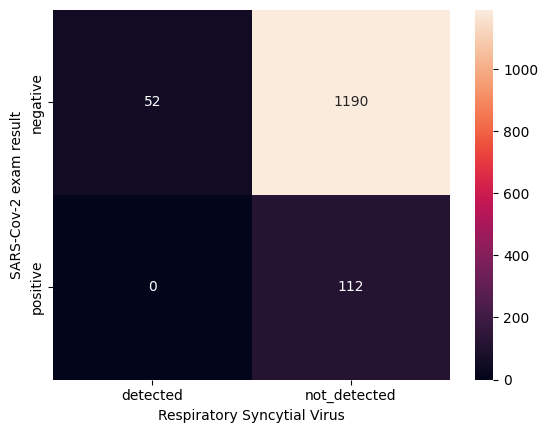

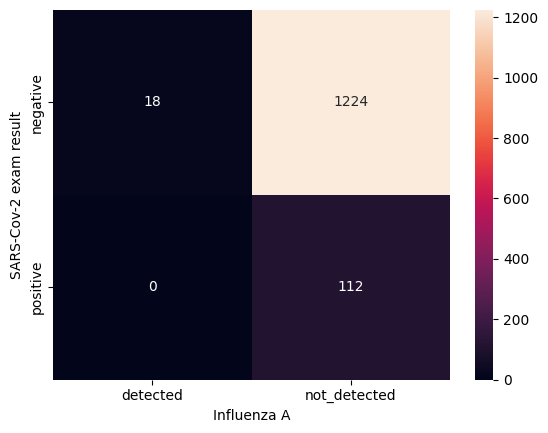

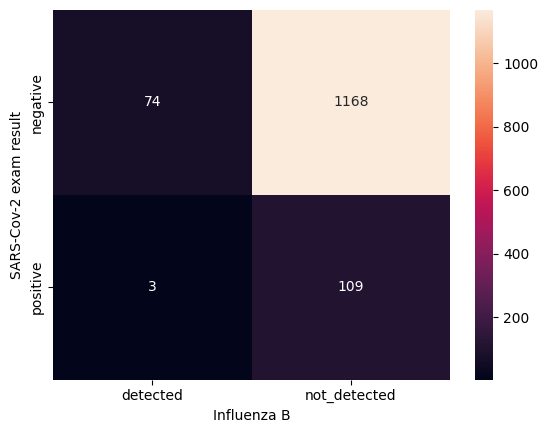

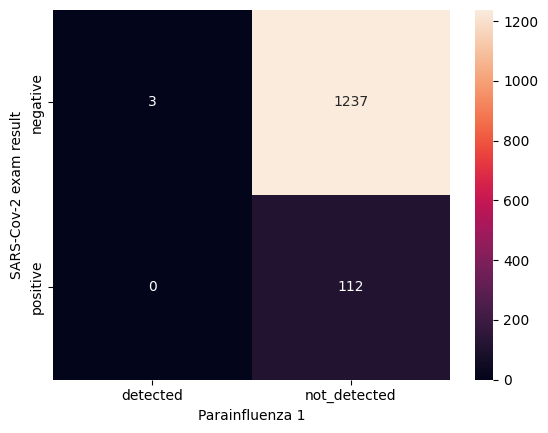

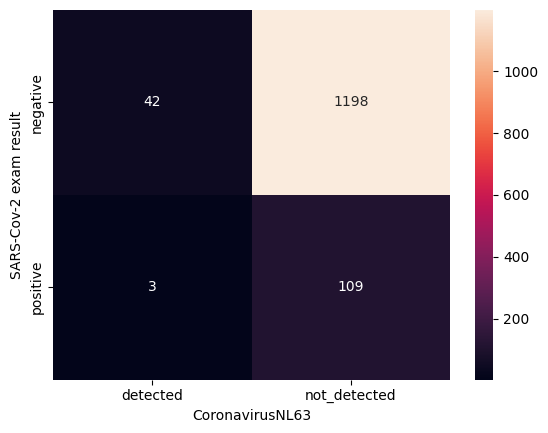

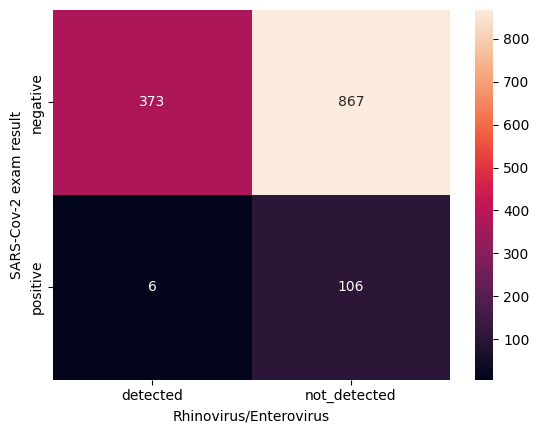

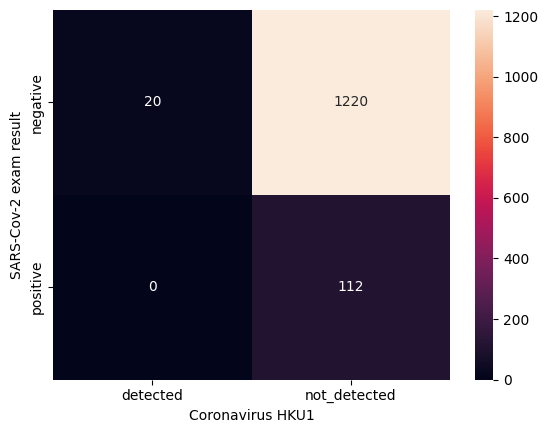

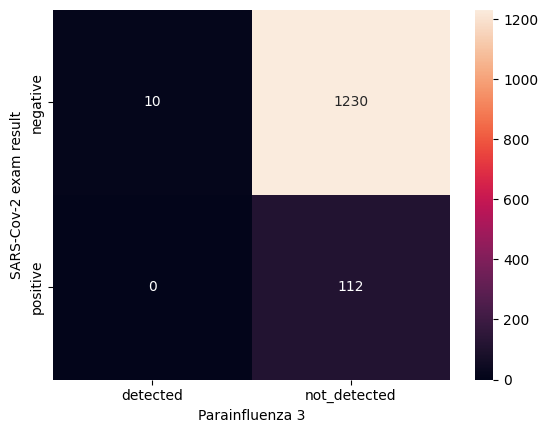

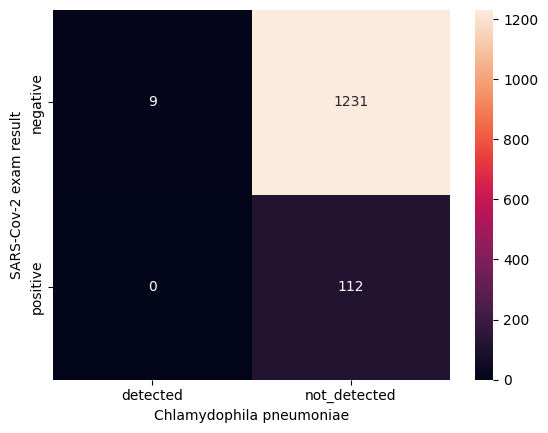

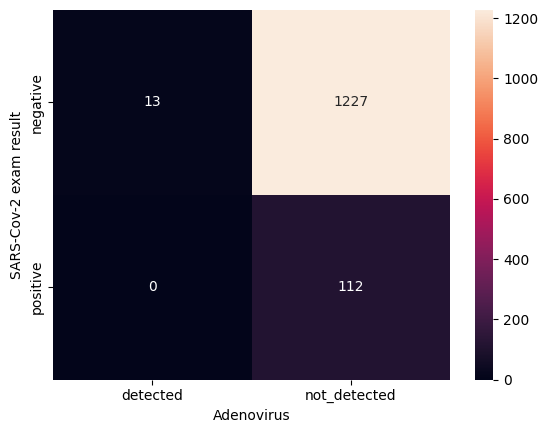

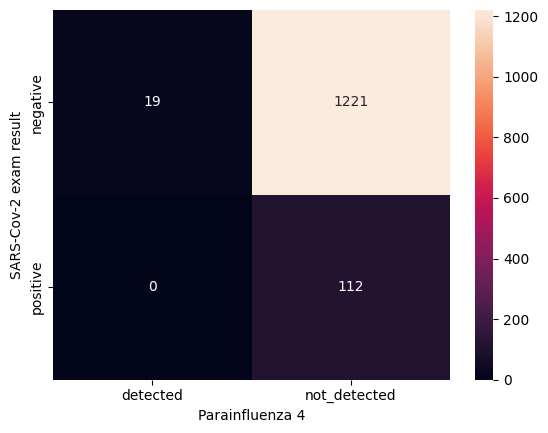

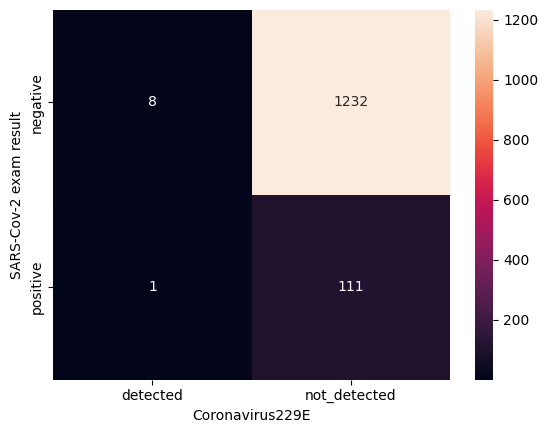

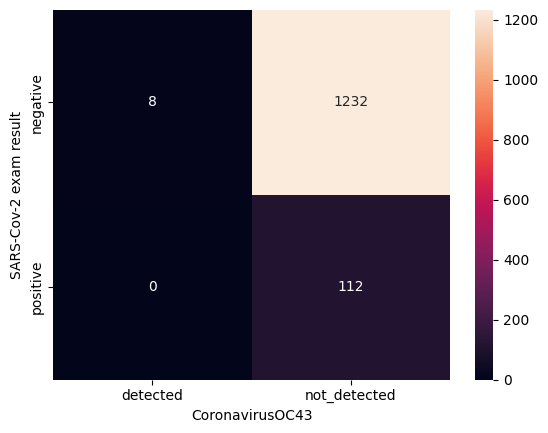

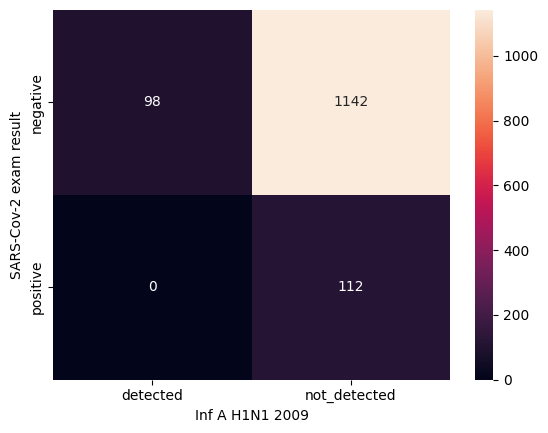

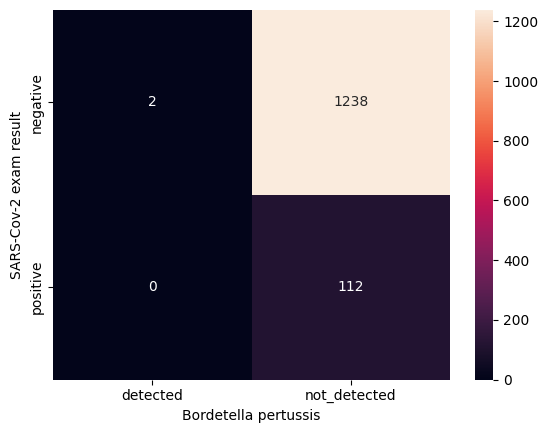

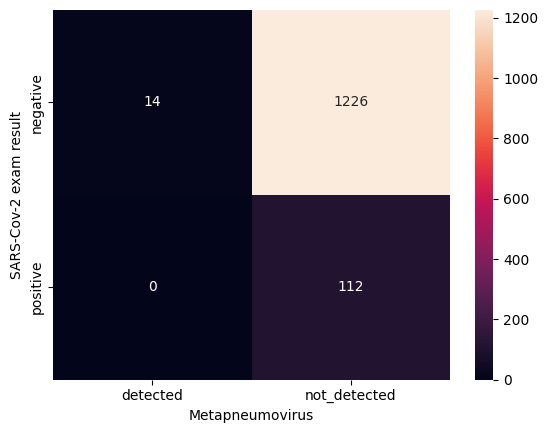

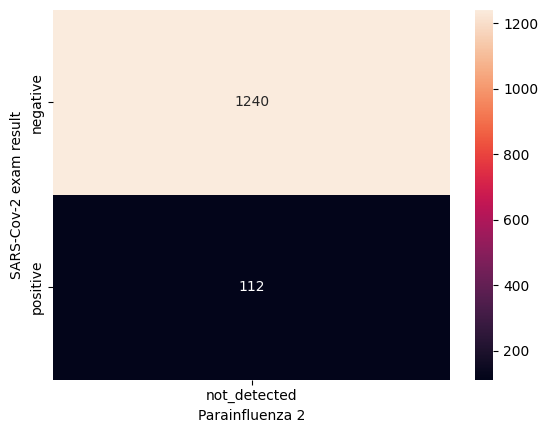

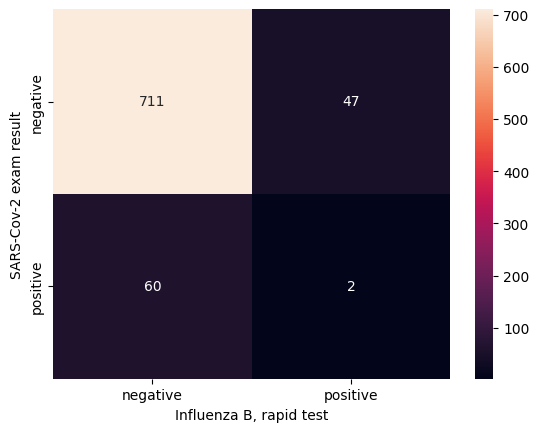

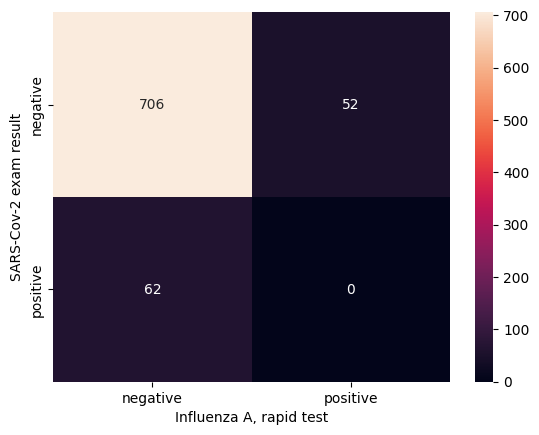

In [73]:
# Création des crosstab
for col in viral_columns:
    pd.crosstab(df['SARS-Cov-2 exam result'], df[col])
    plt.figure()
    sns.heatmap(pd.crosstab(df['SARS-Cov-2 exam result'], df[col]), annot=True, fmt='d')


Analyse un peu plus Avancée

In [41]:
# Relation Variable / Variable

In [42]:
# Relations Taux Sanguin

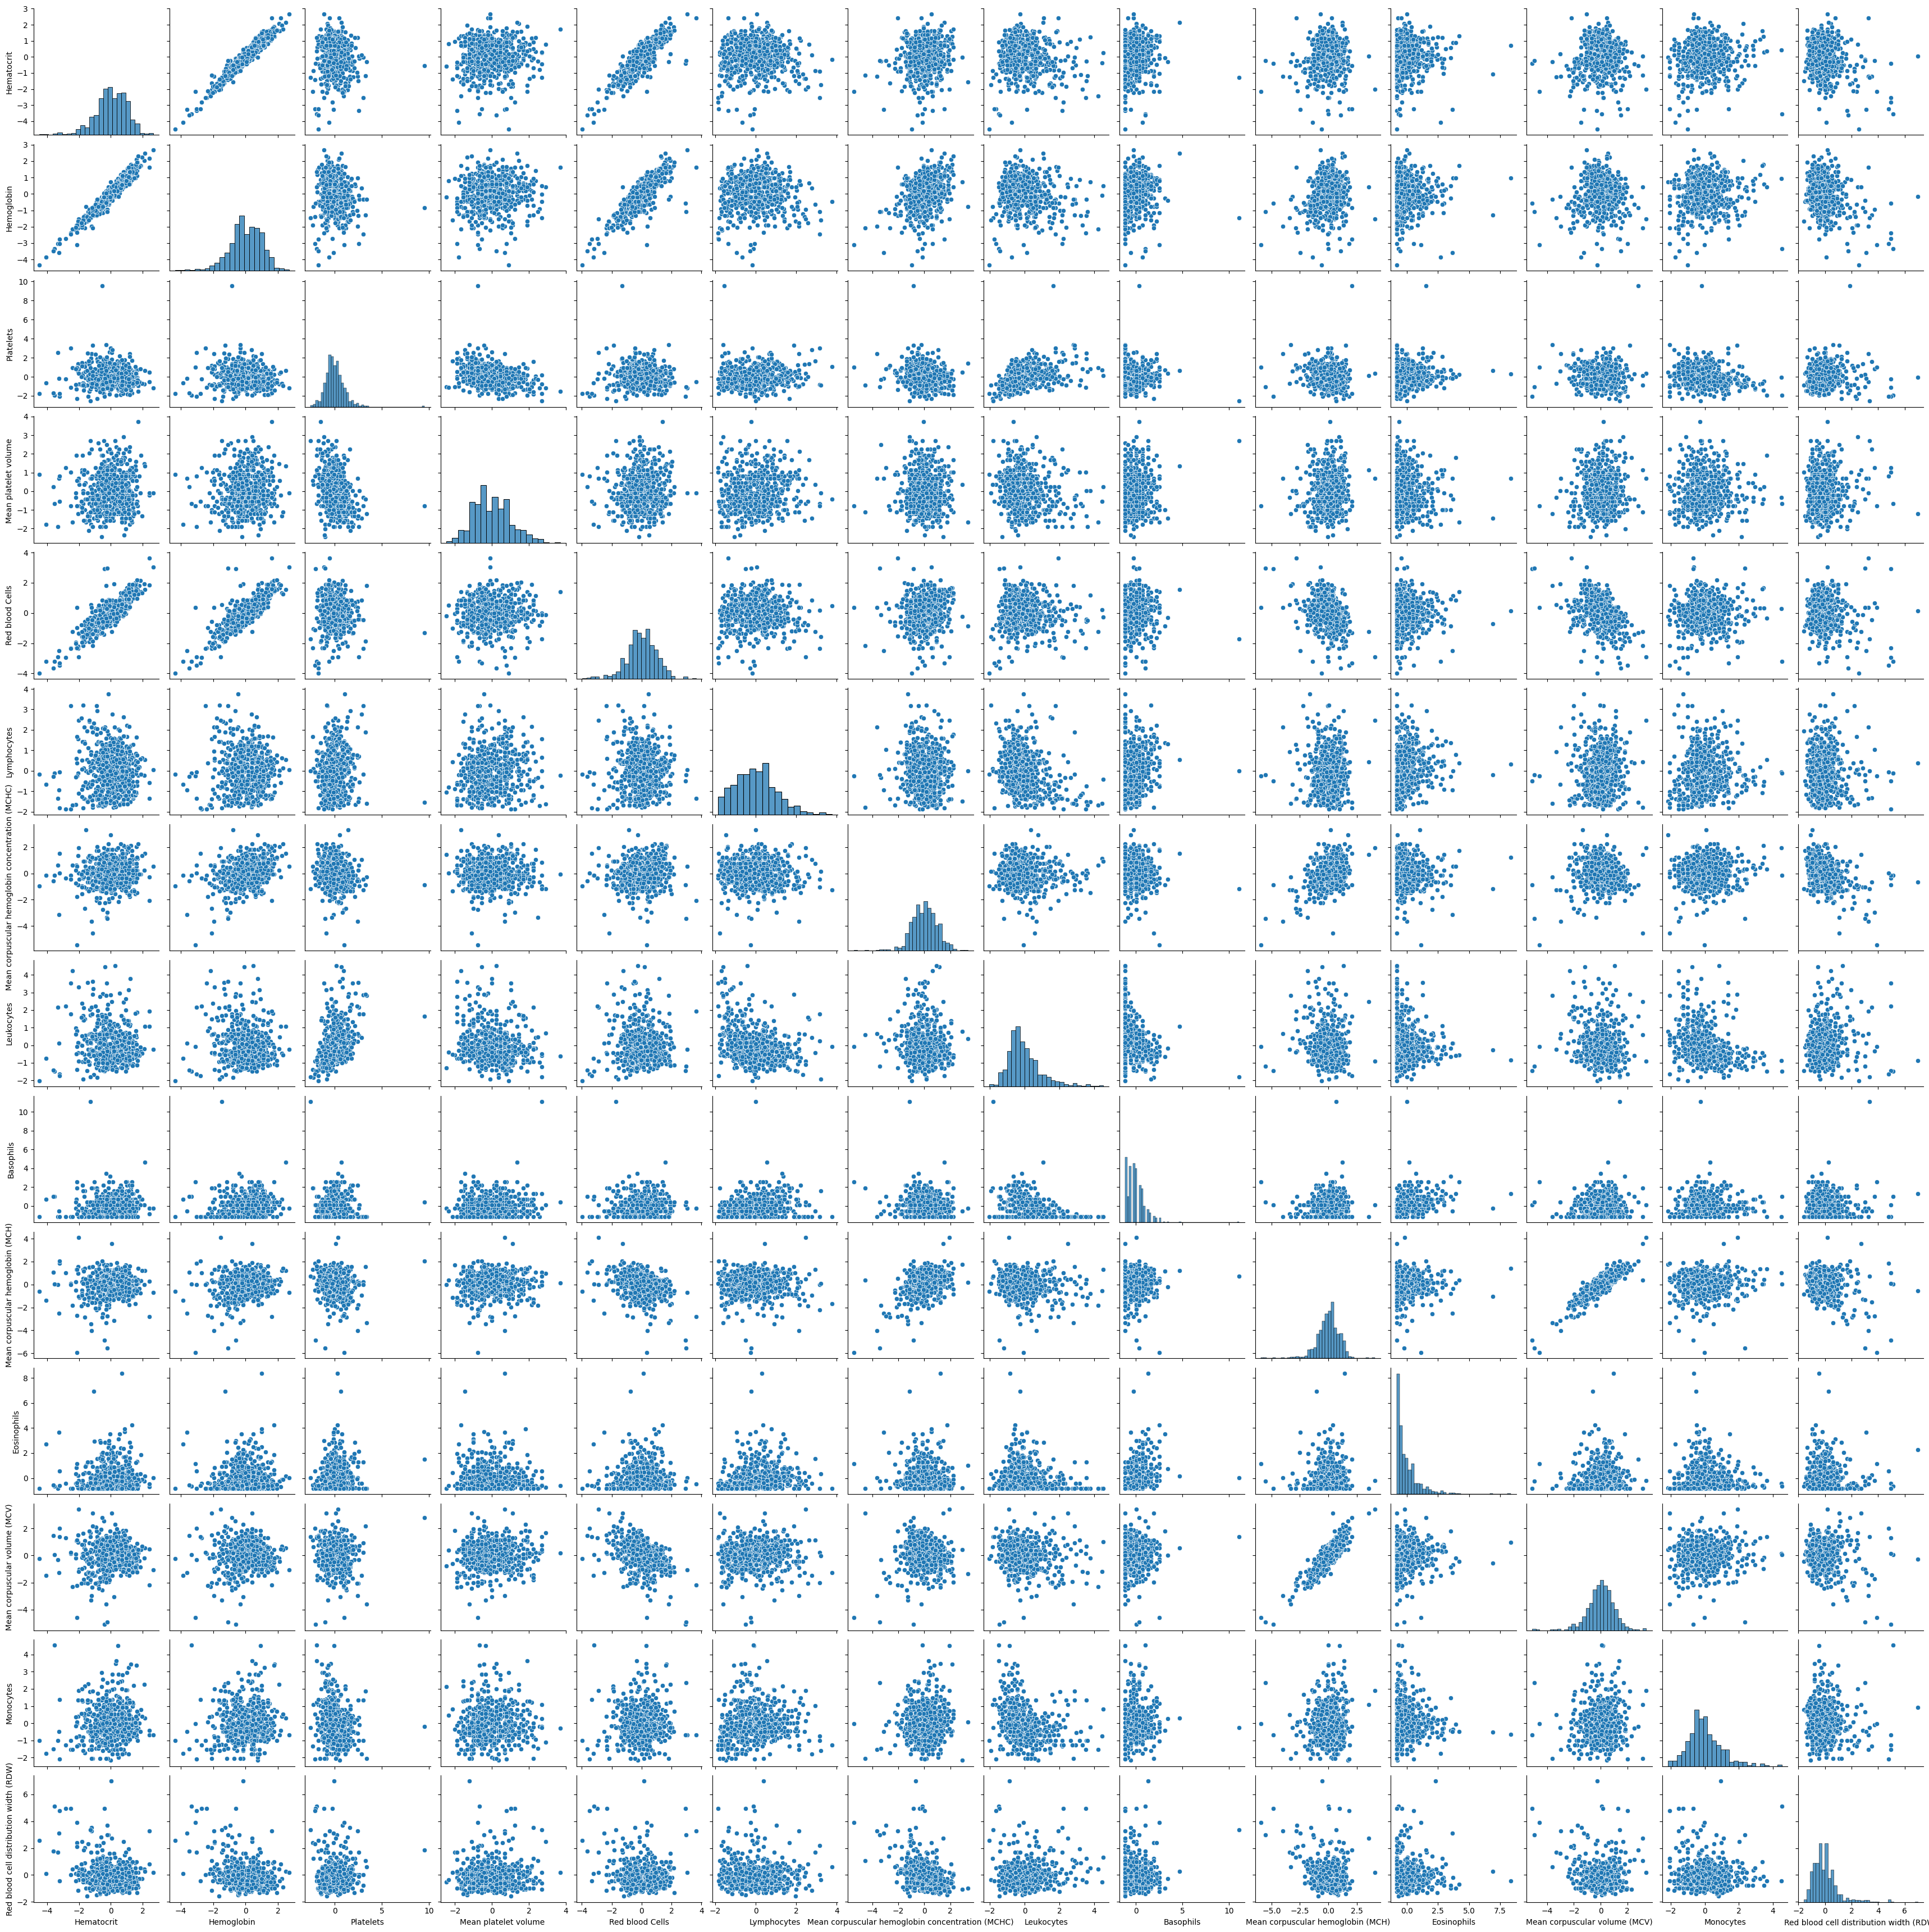

In [74]:
sns.pairplot(df[blood_columns])

<Axes: >

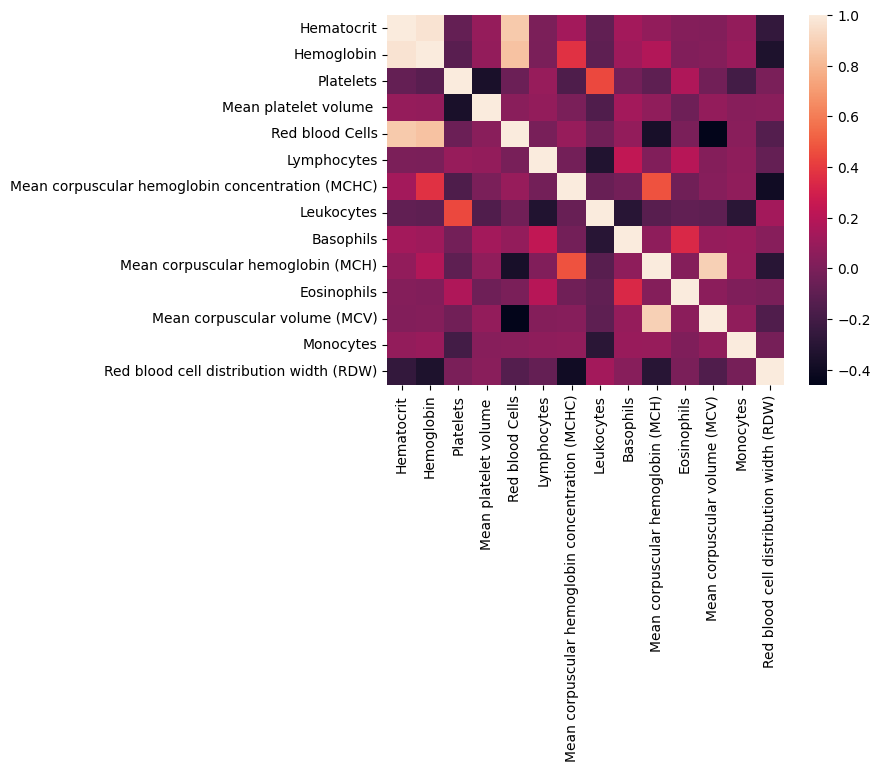

In [75]:
# Etude de la corrélation entre les variables
sns.heatmap(df[blood_columns].corr())

Relation Age / Sang

C:\Users\admin\AppData\Local\Temp\ipykernel_8212\2855336182.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


<Figure size 640x480 with 0 Axes>

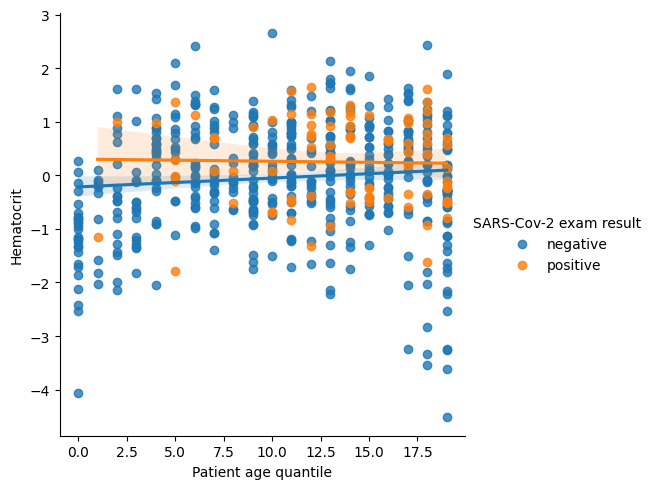

<Figure size 640x480 with 0 Axes>

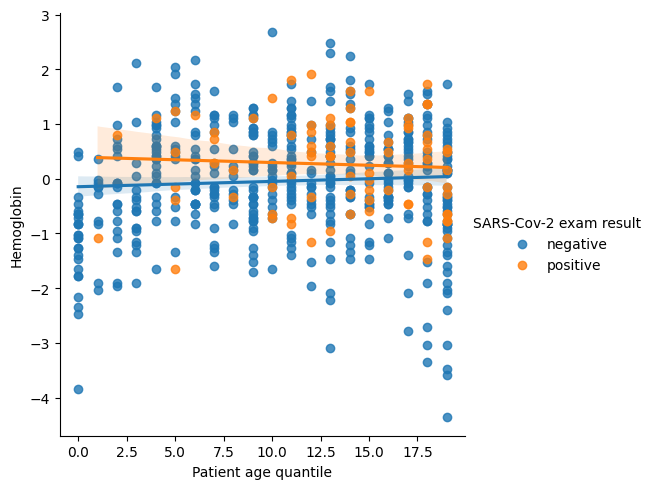

<Figure size 640x480 with 0 Axes>

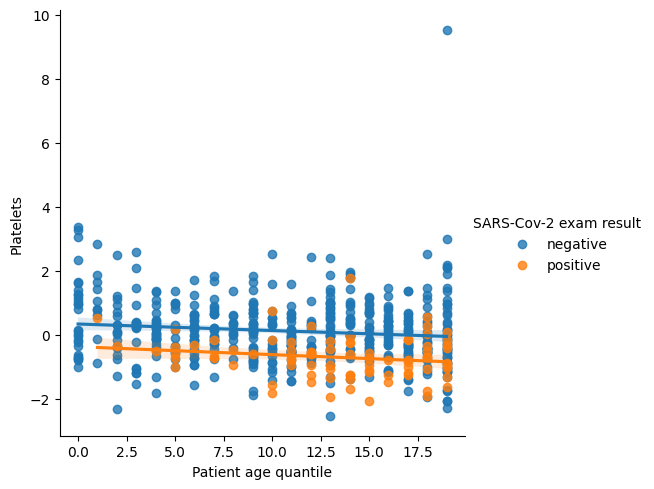

<Figure size 640x480 with 0 Axes>

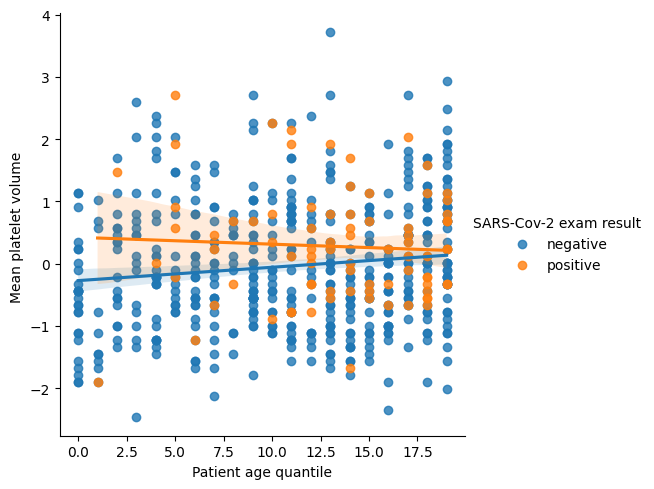

<Figure size 640x480 with 0 Axes>

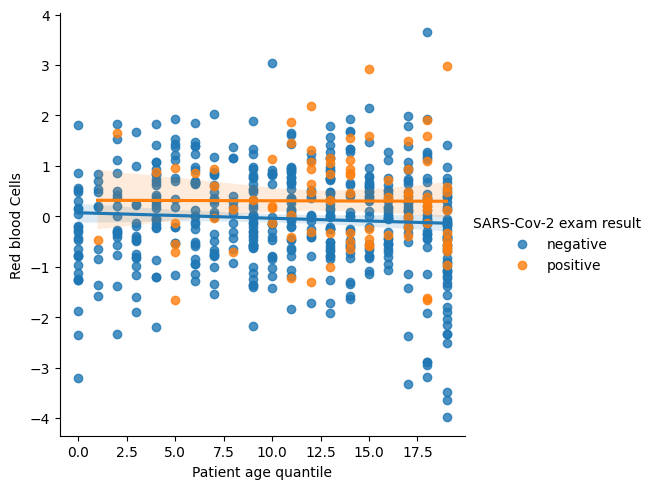

<Figure size 640x480 with 0 Axes>

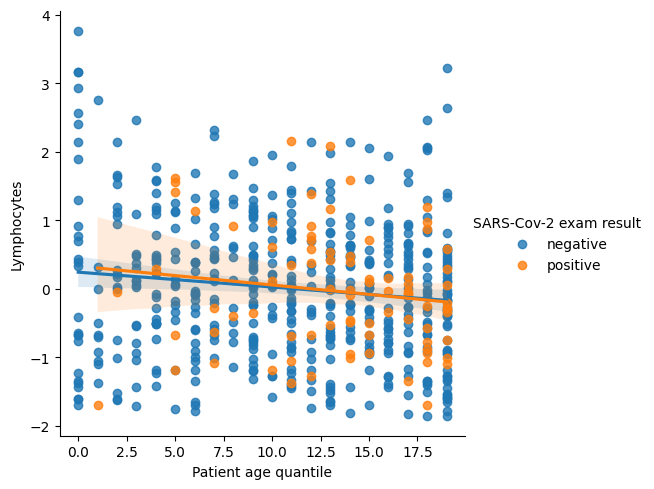

<Figure size 640x480 with 0 Axes>

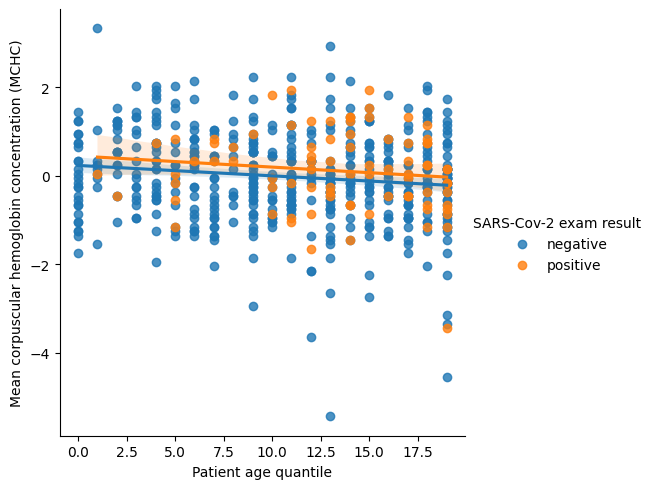

<Figure size 640x480 with 0 Axes>

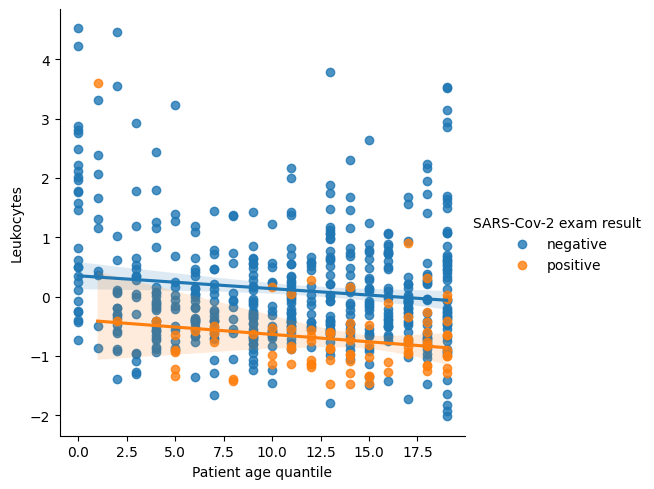

<Figure size 640x480 with 0 Axes>

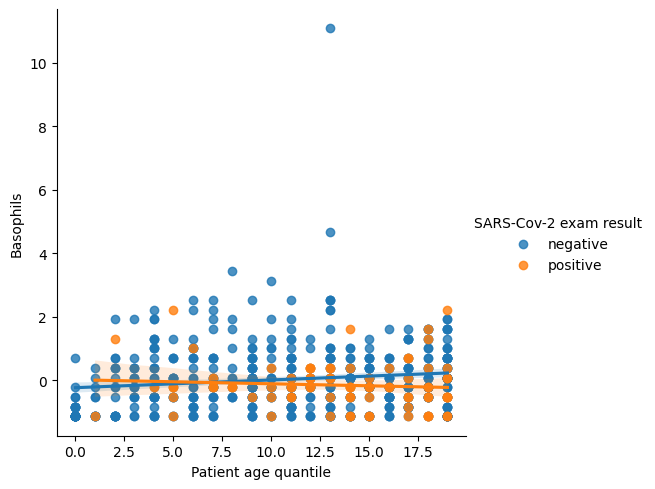

<Figure size 640x480 with 0 Axes>

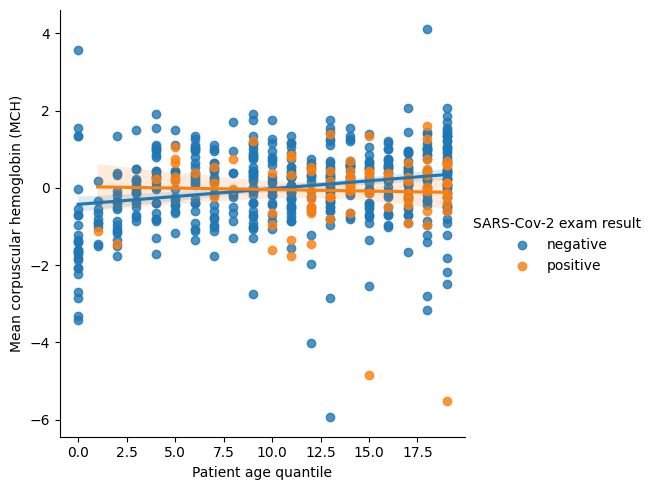

<Figure size 640x480 with 0 Axes>

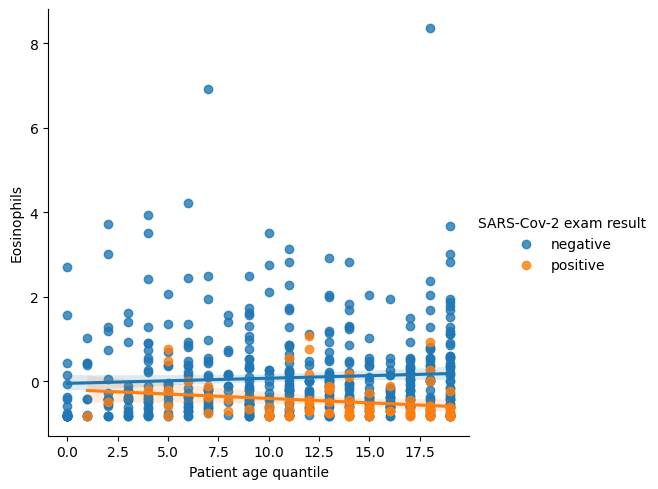

<Figure size 640x480 with 0 Axes>

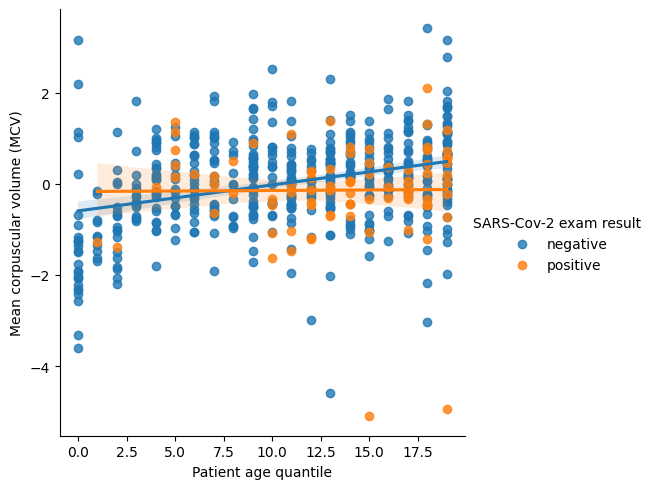

<Figure size 640x480 with 0 Axes>

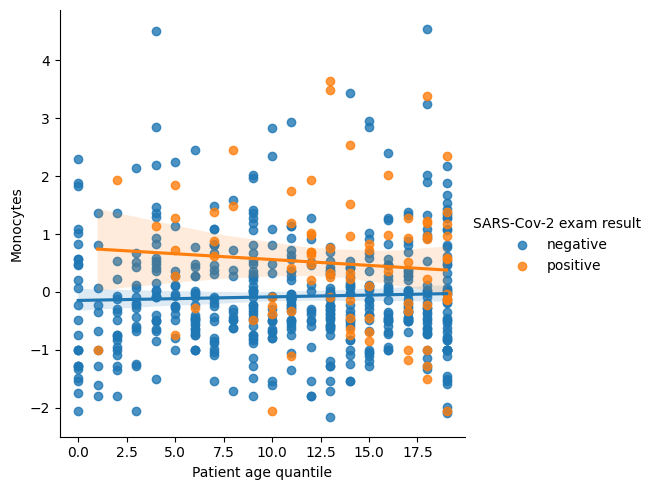

<Figure size 640x480 with 0 Axes>

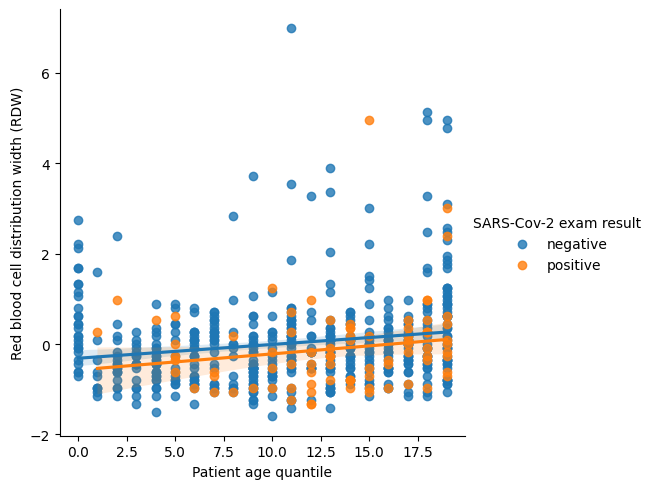

In [76]:
for col in blood_columns:
    plt.figure()
    sns.lmplot(x='Patient age quantile', y=col, hue='SARS-Cov-2 exam result', data=df)


In [77]:
# Matrice de corrélation
df.corr() 

Patient age quantile  \
Patient age quantile                                            1.000000   
Patient addmited to regular ward (1=yes, 0=no)                  0.046166   
Patient addmited to semi-intensive unit (1=yes,...              0.015736   
Patient addmited to intensive care unit (1=yes,...             -0.035772   
Hematocrit                                                      0.096808   
Hemoglobin                                                      0.060320   
Platelets                                                      -0.158683   
Mean platelet volume                                            0.119449   
Red blood Cells                                                -0.037510   
Lymphocytes                                                    -0.125935   
Mean corpuscular hemoglobin concentration (MCHC)               -0.124671   
Leukocytes                                                     -0.166386   
Basophils                                                       0.107525   
Mean corpuscular hemoglobin (MCH)                               0.197394   
Eosinophils                                                     0.022085   
Mean corpuscular volume (MCV)                                   0.281655   
Monocytes                                                       0.050962   
Red blood cell distribution width (RDW)                         0.166429   

                                                    Patient addmited to regular ward (1=yes, 0=no)  \
Patient age quantile                                                                      0.046166   
Patient addmited to regular ward (1=yes, 0=no)                                            1.000000   
Patient addmited to semi-intensive unit (1=yes,...                                       -0.011264   
Patient addmited to intensive care unit (1=yes,...                                       -0.010192   
Hematocrit                                                                               -0.087241   
Hemoglobin                                                                               -0.091867   
Platelets                                                                                -0.183091   
Mean platelet volume                                                                     -0.013134   
Red blood Cells                                                                          -0.053143   
Lymphocytes                                                                              -0.095313   
Mean corpuscular hemoglobin concentration (MCHC)                                         -0.034642   
Leukocytes                                                                               -0.103005   
Basophils                                                                                 0.031833   
Mean corpuscular hemoglobin (MCH)                                                        -0.050703   
Eosinophils                                                                              -0.085636   
Mean corpuscular volume (MCV)                                                            -0.039326   
Monocytes                                                                                -0.000354   
Red blood cell distribution width (RDW)                                                   0.102160   

                                                    Patient addmited to semi-intensive unit (1=yes, 0=no)  \
Patient age quantile                                                                         0.015736       
Patient addmited to regular ward (1=yes, 0=no)                                              -0.011264       
Patient addmited to semi-intensive unit (1=yes,...                                           1.000000       
Patient addmited to intensive care unit (1=yes,...                                          -0.008087       
Hematocrit                                                                                  -0.182215       
Hemoglobin    

Relation Viral / sanguin


In [78]:
# Création d'une nouvelle variable "est malade" qaund la personne est tester positive au moins une seule fois
# colonne est malade
df['est malade'] = np.sum(df[viral_columns[:-2]] == 'detected', axis=1) >=1

In [79]:
df.head()

Patient age quantile SARS-Cov-2 exam result  \
0                    13               negative   
1                    17               negative   
2                     8               negative   
3                     5               negative   
4                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW) Respiratory Syncytial Virus  \
0                                      NaN                         NaN   
1                                -0.625073                not_detected   
2                                      NaN                         NaN   
3                                      NaN                         NaN   
4                                      NaN                not_detected   

    Influenza A   Influenza B Parainfluenza 1 CoronavirusNL63  \
0           NaN           NaN             NaN             NaN   
1  not_detected  not_detected    not_detected    not_detected   
2           NaN           NaN             NaN             NaN   
3           NaN           NaN             NaN             NaN   
4  not_detected  not_detected    not_detected    not_detected   

  Rhinovirus/Enterovirus Coronavirus HKU1 Parainfluenza 3  \
0                    NaN              NaN             NaN   
1               detected     not_detected    not_detected   
2           

In [80]:
malade_df = df[df['est malade'] == True]
non_malade_df = df[df['est malade'] == False]

c:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

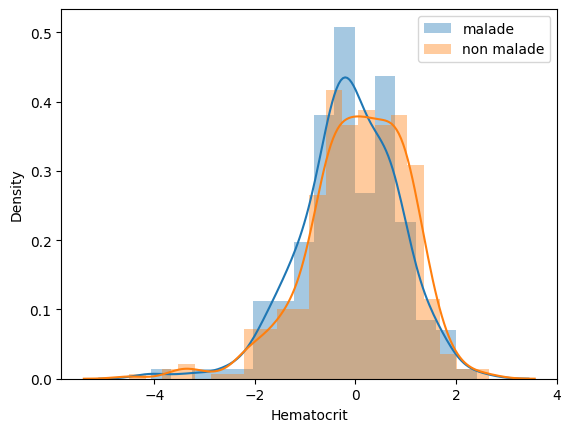

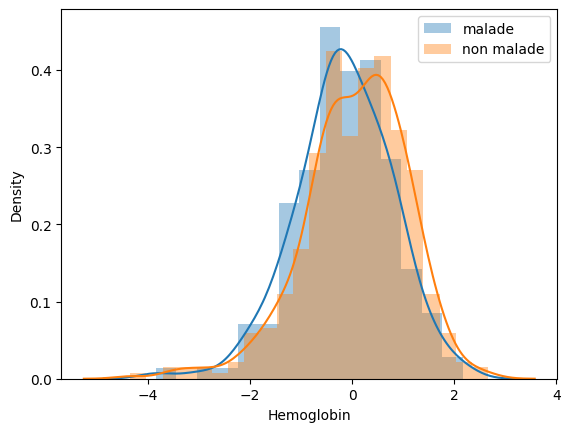

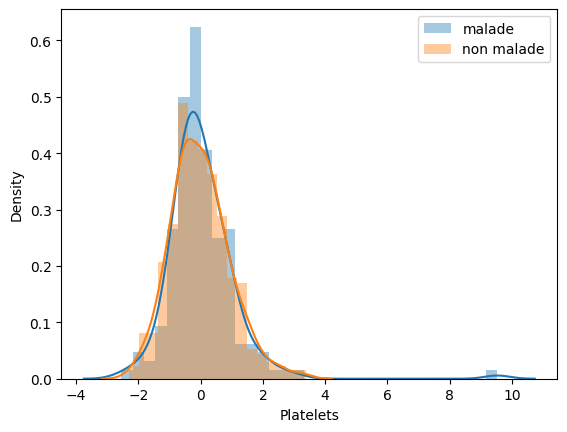

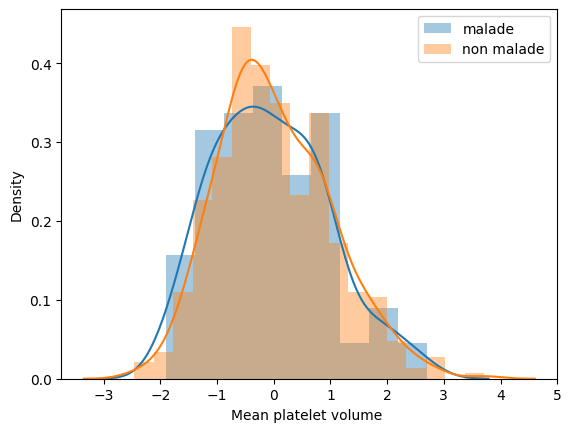

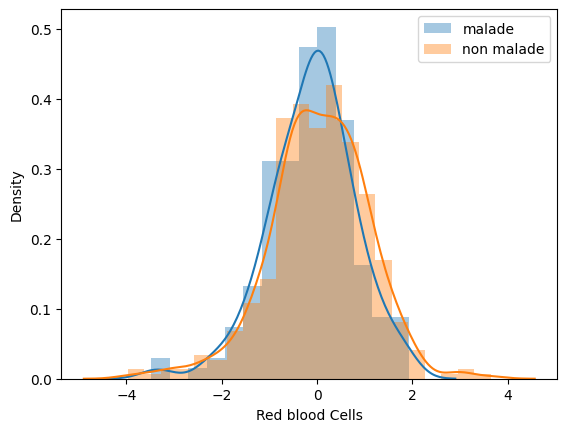

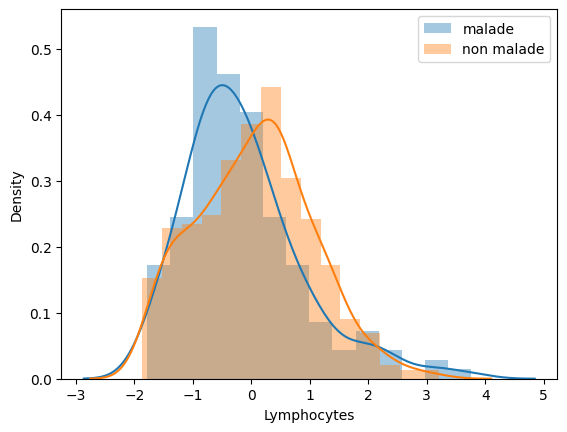

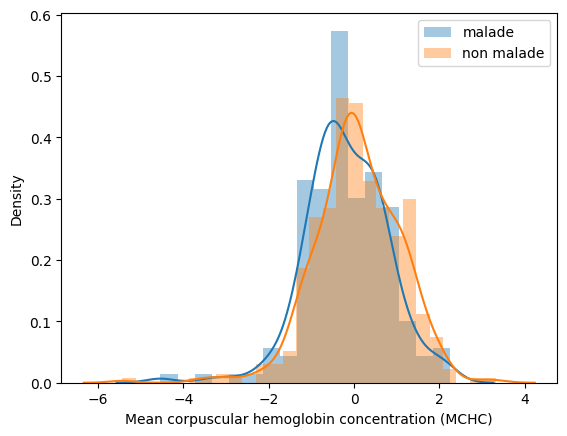

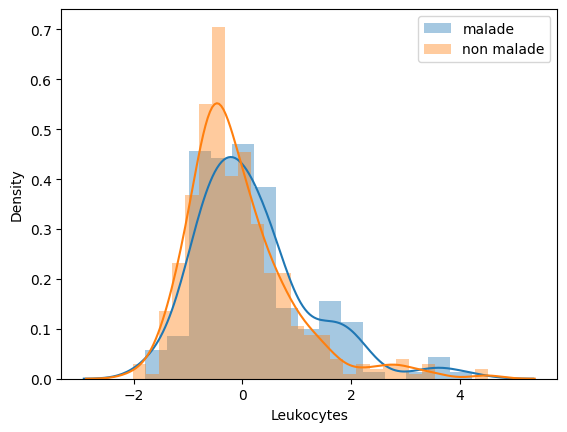

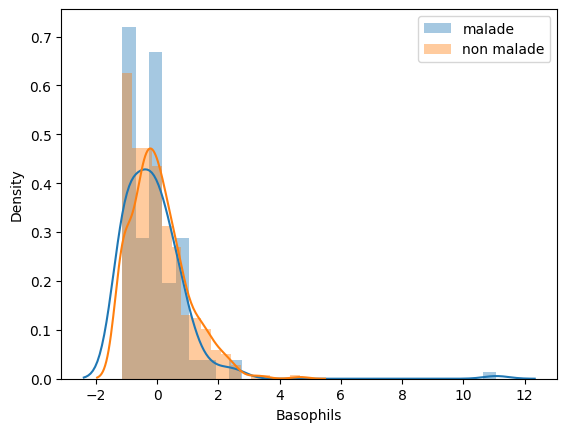

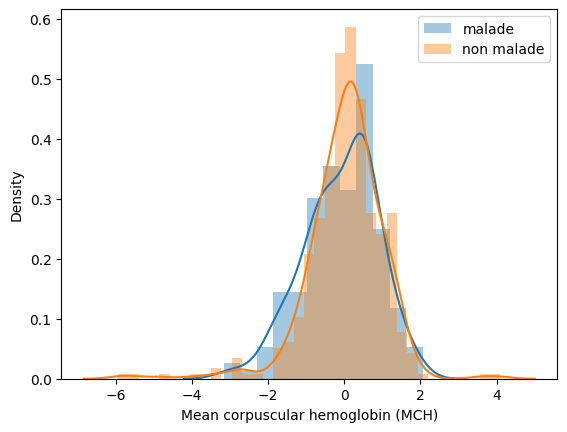

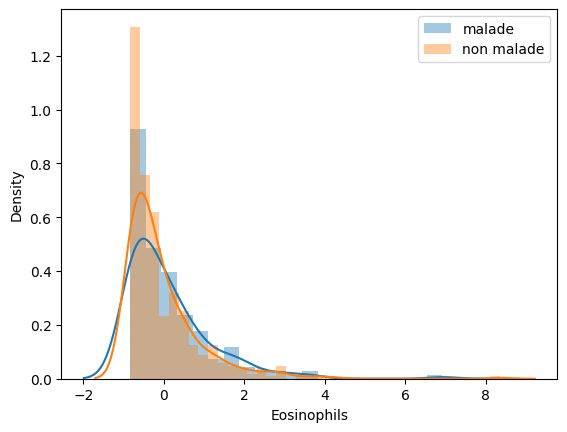

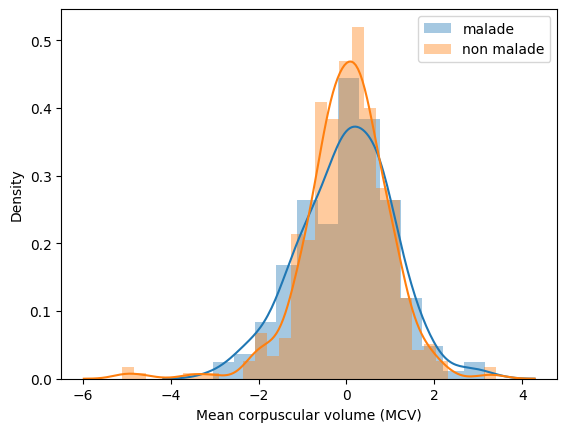

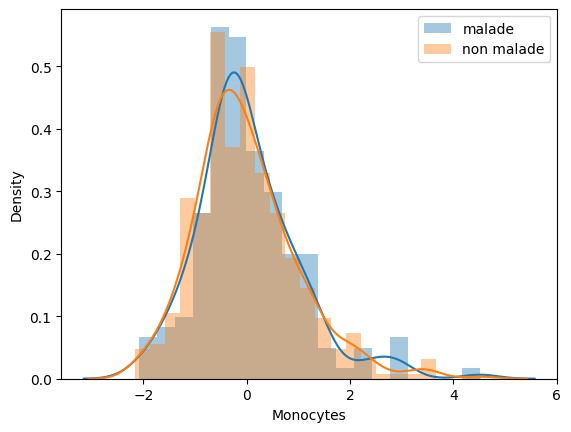

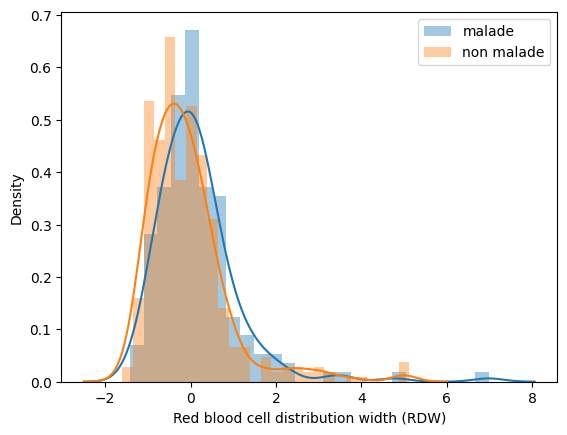

In [81]:
for col in blood_columns:
    plt.figure()
    sns.distplot(malade_df[col], label='malade')
    sns.distplot(non_malade_df[col], label='non malade')
    plt.legend()

In [82]:
def hospitalisation(df):
    if df['Patient addmited to regular ward (1=yes, 0=no)'] == 1:
        return 'surveillance'
    elif df['Patient addmited to semi-intensive unit (1=yes, 0=no)'] == 1:
        return 'soins semi-intensives'
    elif df['Patient addmited to intensive care unit (1=yes, 0=no)'] == 1:
        return 'soins intensifs'
    else:
        return 'inconnu'

In [83]:
df['statut'] = df.apply(hospitalisation, axis=1)
df.head()

Patient age quantile SARS-Cov-2 exam result  \
0                    13               negative   
1                    17               negative   
2                     8               negative   
3                     5               negative   
4                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW) Respiratory Syncytial Virus  \
0                                      NaN                         NaN   
1                                -0.625073                not_detected   
2                                      NaN                         NaN   
3                                      NaN                         NaN   
4                                      NaN                not_detected   

    Influenza A   Influenza B Parainfluenza 1 CoronavirusNL63  \
0           NaN           NaN             NaN             NaN   
1  not_detected  not_detected    not_detected    not_detected   
2           NaN           NaN             NaN             NaN   
3           NaN           NaN             NaN             NaN   
4  not_detected  not_detected    not_detected    not_detected   

  Rhinovirus/Enterovirus Coronavirus HKU1 Parainfluenza 3  \
0                    NaN              NaN             NaN   
1               detected     not_detected    not_detected   
2           

c:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

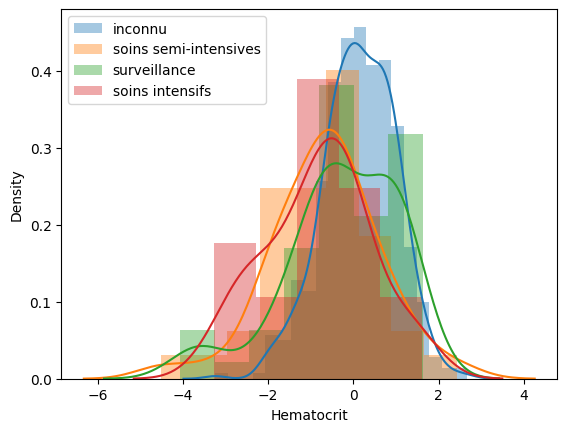

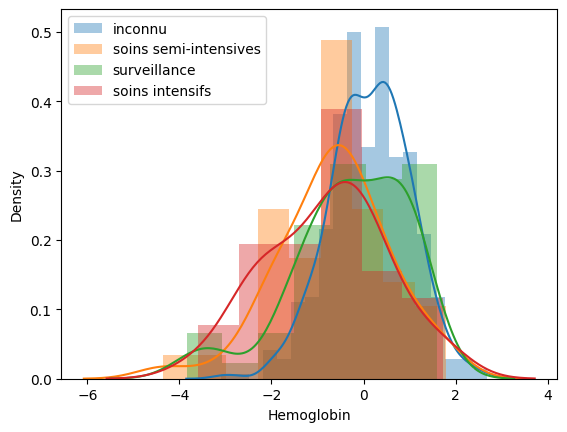

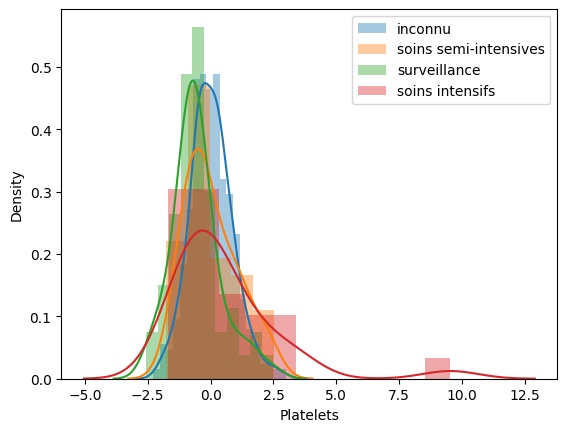

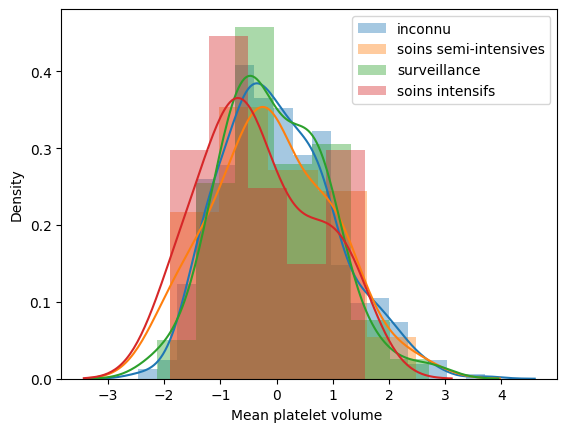

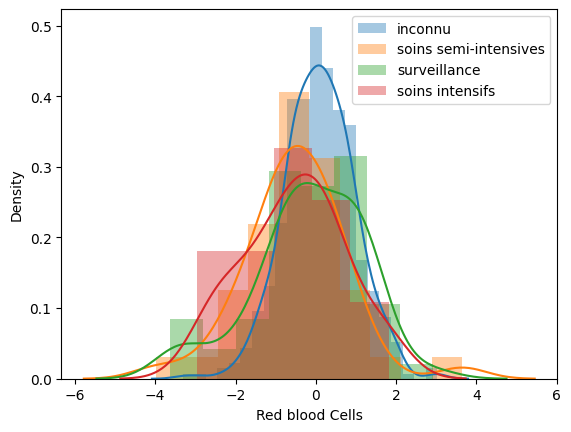

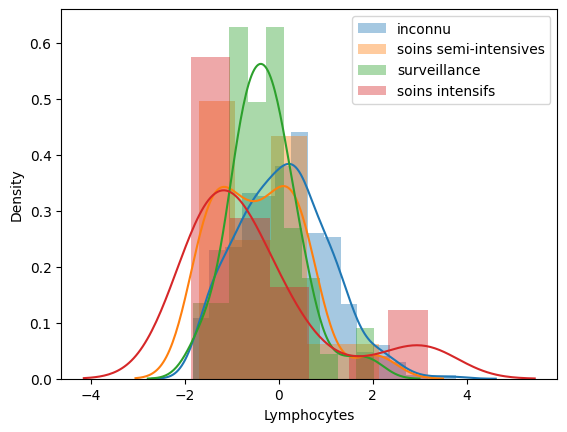

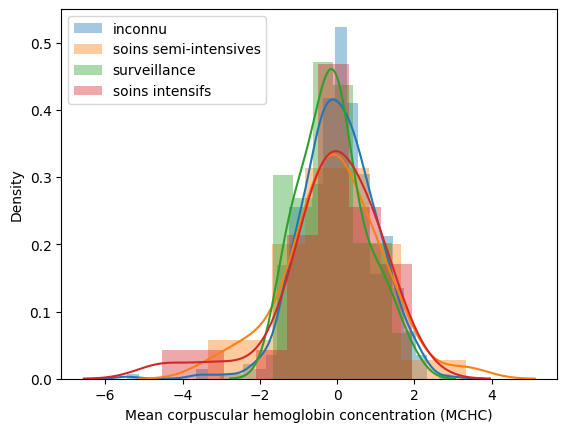

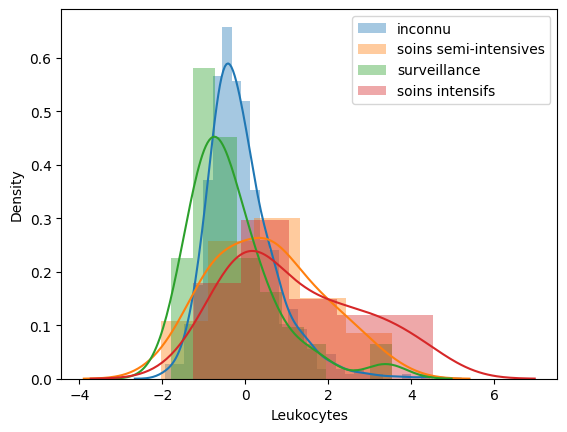

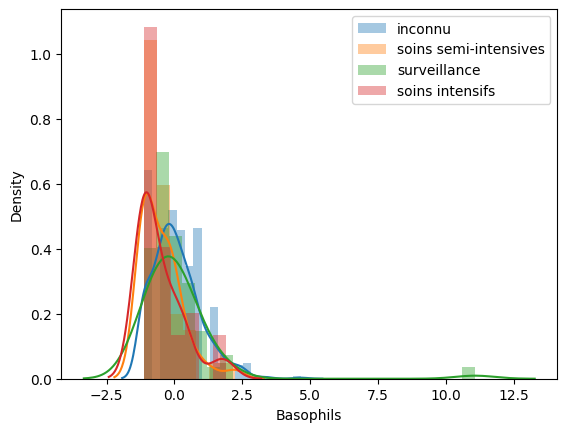

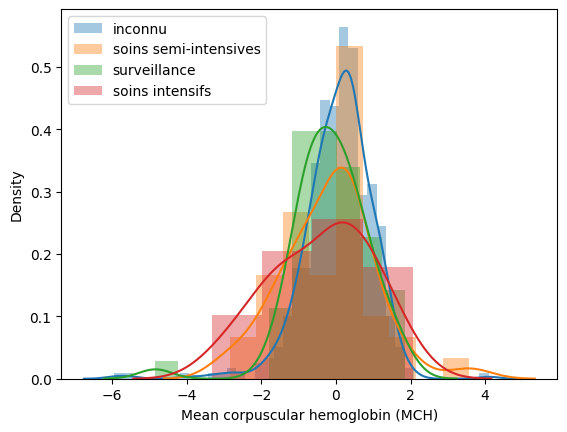

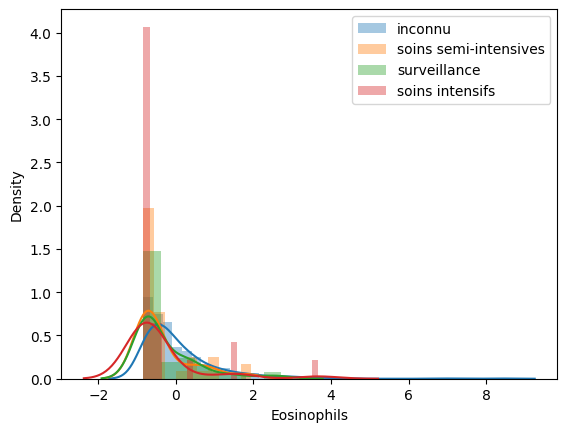

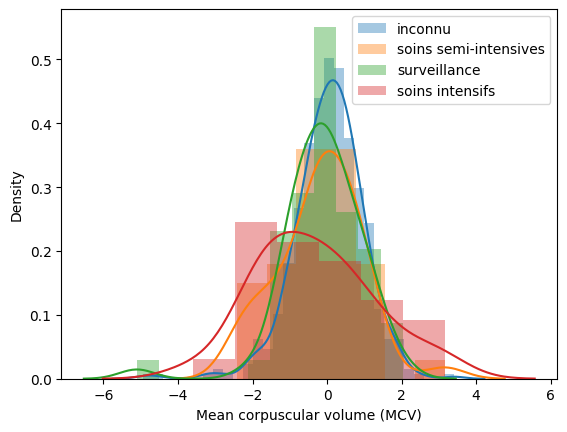

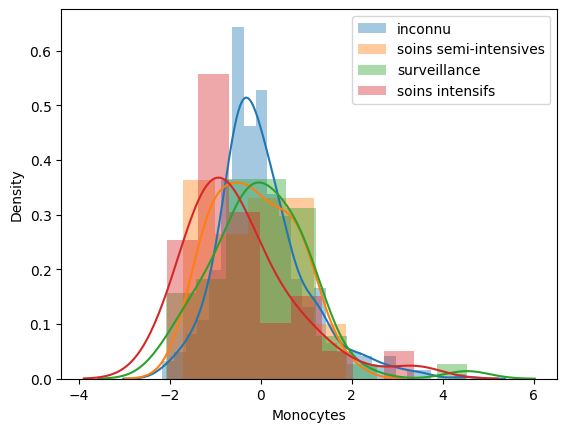

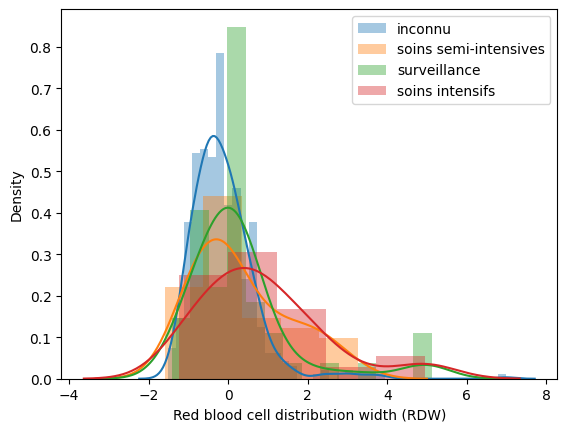

In [84]:
for col in blood_columns:
    plt.figure()
    for cat in df['statut'].unique():
        sns.distplot(df[df['statut']==cat][col], label=cat)
    plt.legend()

T-Test

In [54]:
# On fait un test de student pour vérifier quelques hypothéses
# H0 = 

In [85]:
from scipy.stats import ttest_ind
positive_df

Patient age quantile SARS-Cov-2 exam result  \
67                       7               positive   
284                     16               positive   
513                     10               positive   
568                      2               positive   
676                     15               positive   
...                    ...                    ...   
5632                    16               positive   
5633                     4               positive   
5634                    15               positive   
5639                     3               positive   
5643                    19               positive   

      Patient addmited to regular ward (1=yes, 0=no)  \
67                                                 0   
284                                                1   
513                                                0   
568                                                0   
676                                                0   
...                                              ...   
5632                                               0   
5633                                               0   
5634                                               0   
5639                                               0   
5643                                               0   

      Patient addmited to semi-intensive unit (1=yes, 0=no)  \
67                                                    0       
284                                                   0       
513                                                   0       
568                                                   0       
676                                                   0       
...                                                 ...       
5632                                                  0       
5633                                                  0       
5634                                                  0       
5639                                                  0       
5643                                                  0       

      Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
67                                                    0             NaN   
284                                                   0             NaN   
513                                                   0             NaN   
568                                                   0        0.991838   
676                                                   0             NaN   
...                                                 ...             ...   
5632                                                  0             NaN   
5633                                                  0             NaN   
5634                                                  0             NaN   
5639                                                  0             NaN   
5643                                                  0        0.694287   

      Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  \
67           NaN        NaN                    NaN              NaN   
284          NaN        NaN                    NaN              NaN   
513          NaN        NaN                    NaN              NaN   
568     0.792188  -0.341548               1.469188         1.653476   
676          NaN        NaN                    NaN              NaN   
...          ...        ...                    ...              ...   
5632         NaN        NaN                    NaN              NaN   
5633         NaN        NaN                    NaN              NaN   
5634         NaN        NaN                    NaN              NaN   
5639         NaN        NaN                    NaN              NaN   
5643    0.541564  -0.906829              -0.325903         0.578024   

      Lymphocytes  Mean corpuscular hemoglobin concentration (MCHC)  \
67            NaN                                               NaN   
284           NaN                          

In [86]:
# On echantillonne le dataset et on prend juste 558 lignes pour avoir un équilibre entre les gens positifs et les gens négatifs
balanced_neg = negative_df.sample(positive_df.shape[0])

In [87]:

def t_test(col):
    alpha = 0.02 # le sueil alpha est de 2%
    stat, p = ttest_ind(balanced_neg[col].dropna(), positive_df[col].dropna())
    if p < alpha:
        return 'H0 Rejetée'
    else :
        return 0

In [88]:
for col in blood_columns:
    print(f'{col :-<50} {t_test(col)}')

Hematocrit---------------------------------------- 0
Hemoglobin---------------------------------------- 0
Platelets----------------------------------------- H0 Rejetée
Mean platelet volume ----------------------------- 0
Red blood Cells----------------------------------- 0
Lymphocytes--------------------------------------- 0
Mean corpuscular hemoglobin concentration (MCHC)-- 0
Leukocytes---------------------------------------- H0 Rejetée
Basophils----------------------------------------- 0
Mean corpuscular hemoglobin (MCH)----------------- 0
Eosinophils--------------------------------------- H0 Rejetée
Mean corpuscular volume (MCV)--------------------- 0
Monocytes----------------------------------------- H0 Rejetée
Red blood cell distribution width (RDW)----------- 0
